In [2]:
from IPython.display import clear_output
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import time

In [4]:
import seaborn as sns

In [5]:
from sklearn.ensemble import ExtraTreesRegressor as etr#, RandomForestRegressor as rfr, BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier as etc#, RandomForestClassifier as rfc, BaggingClassifier
#from sklearn.ensemble import GradientBoostingClassifier as gbc, AdaBoostClassifier as abc

from sklearn.preprocessing import LabelEncoder as le, StandardScaler as ss, MinMaxScaler as mms
from sklearn.metrics import r2_score, confusion_matrix as cm, classification_report as cr, accuracy_score as acc_scr

In [6]:
memory_ext_copy = pd.read_csv('jogo_da_velha_ext2.csv')

memory_df = memory_ext_copy.copy()

In [7]:
memory_df['fatal_move'] = pd.Series(memory_df['reward2'].iloc[1:].tolist()+[0], index=memory_df.index)
memory_df['fatal_move2'] = pd.Series(memory_df['reward'].iloc[1:].tolist()+[0], index=memory_df.index)

In [8]:
eps = memory_df['ep'].tolist()

eps_uni = np.unique(eps)

new_lst = [0]

a = 0
eps_1on = eps[1:]
len_eps = len(eps_1on)
s130 = int(len_eps/130)

for i, ep in enumerate(eps_1on):

    if ep==eps[i]: 
        a = (0 if a==1 else 1)
        new_lst.append(a)
    else: 
        a = 0
        new_lst.append(a)
        
    if i in range(1,len_eps,s130): 
        clear_output(wait=True)
    
        print(i, '/', len_eps)


np.array([new_lst[:30], eps[:30]])

memory_df['player'] = new_lst

8910331 / 8910442


In [9]:
action2_lst = memory_df.action2.tolist()

first_round = [1 if i==-1 else 0 for i in action2_lst]

memory_df['first_round'] = first_round

In [10]:
players_col = memory_df['player'].copy()

In [11]:
msk_player1 = players_col==0
msk_player2 = players_col==1

In [12]:
player1 = memory_df[msk_player1].reset_index(drop=True)

player2 = memory_df[msk_player2].reset_index(drop=True)

In [13]:
player2

,ep,round,obs,action,reward,action2,reward2,ttl_reward,decay_reward,ttl_reward2,decay_reward2,fatal_move,fatal_move2,player,first_round
0,1,2,6,6,0,3,0,1,0.222222,0,0.00,0,0,1,0
1,1,4,634,4,0,8,0,1,0.666667,0,0.00,0,0,1,0
2,1,6,63485,5,0,0,0,1,1.111111,0,0.00,0,0,1,0
3,1,8,6348507,7,0,2,0,1,1.555556,0,0.00,0,1,1,0
4,2,2,6,6,0,8,0,0,0.000000,0,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022334,1139999,6,87210,0,0,5,0,1,1.428571,0,0.00,0,1,1,0
4022335,1140000,2,8,8,0,2,0,0,0.000000,1,0.25,0,0,1,0
4022336,1140000,4,820,0,0,3,0,0,0.000000,1,0.75,0,0,1,0
4022337,1140000,6,82031,1,0,5,0,0,0.000000,1,1.25,0,0,1,0


# Reward Functions

In [13]:
a = memory_df['reward']
b = memory_df['ttl_reward']
c =  memory_df['decay_reward']
d = memory_df['reward2']
e = memory_df['ttl_reward2']
f =  memory_df['decay_reward2']
g =  memory_df['fatal_move']
h =  memory_df['fatal_move2']
l = memory_df['first_round']

In [14]:
a = player1['reward']
b = player1['ttl_reward']
c =  player1['decay_reward']
d = player1['reward2']
e = player1['ttl_reward2']
f =  player1['decay_reward2']
g =  player1['fatal_move']
h =  player1['fatal_move2']
l = player1['first_round']

In [22]:
a = player2['reward']
b = player2['ttl_reward']
c =  player2['decay_reward']
d = player2['reward2']
e = player2['ttl_reward2']
f =  player2['decay_reward2']
g =  player2['fatal_move']
h =  player2['fatal_move2']

In [23]:
indv = [-a,-b,-c,d,e,f,g,-h]
names_indv = [i.name for i in indv]

In [ ]:
name_a = 'reward'
ya = a

name_b = 'total_reward'
yb = b

name_c = 'decay_reward'
yc = c

name_d = 'fatal_move'
yd = -g

name_e = 'first_round'
ye = l

In [25]:
x = memory_df[['round', 'obs', 'action', 'action2', 'first_round', 'player']]
#x = memory_df[['round', 'obs', 'action', 'action2', 'fatal_move', 'fatal_move2', 'player']]

In [17]:
x_p1 = player1[['round', 'obs', 'action', 'action2', 'first_round', 'player']]
#x = memory_df[['round', 'obs', 'action', 'action2', 'fatal_move', 'fatal_move2', 'player']]

In [24]:
x_p2 = player2[['round', 'obs', 'action', 'action2', 'first_round', 'player']]
#x = memory_df[['round', 'obs', 'action', 'action2', 'fatal_move', 'fatal_move2', 'player']]

In [1095]:
name1 = '+-a+b*c'
y1 = a  + (b * c) - d - (e * f)    

name2='reward+decay'
y2 = a  + c

name3='+-reward+-decay'
y3 = a + c - d - f

name4='reward+ttl'
y4 = a  + b

name5 = 'rew+ttl-fatal'
y5 = a + b - g

name6 = 'rew-fatal'
y6 = a - g

name7 = '+-a+b*c - g'
y7 = a  + (b * c) - d - (e * f) - g

name8 = 'a+c-f-g'
y8 = a  + (c) - (f) - g

name10 = 'first_round'
y10 =  a  + (b * c) - d - (e * f) + l*b

In [19]:
name1 = '+-a+b*c'
y1_op = -a  - (b * c) + d + (e * f)    

name2 = 'reward+decay'
y2_op = d + f

name3='+-reward+-decay'
y3_op = -a - c + d + f

name4='reward+ttl'
y4_op = d + e

name5 = 'rew+ttl-fatal'
y5_op = d + e - h

name6 = 'rew-fatal'
y6_op = d - h

name7 = '+-a+b*c - g'
y7_op = - a - (b * c) + d + (e * f) -h

name8 = 'a+c-f-g'
y8_op = d + (f) - (c) - h

name9 = 'd+e-h'
y9_op = d + e - h

name10 = 'd+e+f'
y10_op = d + e + f

In [1096]:
rewards = {name1:y1, name2:y2, name3:y3, name4:y4, name5:y5, name6:y6, name7:y7, name8:y8, name10:y10}
rewards_enc = {key:pd.Series(le().fit_transform(y_i), index=y_i.index) for key, y_i in zip(rewards.keys(), rewards.values())}

names = [key for key in rewards.keys()]
y_enc = [yi for yi in rewards_enc.values()]
y_i = [yi for yi in rewards.values()]

In [ ]:
rewards_op = {name1:y1_op, name2:y2_op, name3:y3_op, name4:y4_op, name5:y5_op, name6:y6_op, name7:y7_op, name8:y8_op, name9:y9_op, name10:y10_op}
rewards_op_enc = {key:pd.Series(le().fit_transform(y_i), index=y_i.index) for key, y_i in zip(rewards_op.keys(), rewards_op.values())}

names_op = [key for key in rewards_op.keys()]
y_enc_op = [yi for yi in rewards_op_enc.values()]
y_i_op = [yi for yi in rewards_op.values()]

In [27]:
#rewards_op = {name1:y1_op, name2:y2_op, name3:y3_op, name4:y4_op, name5:y5_op, name6:y6_op, name7:y7_op, name8:y8_op, name9:y9_op, name10:y10_op}
rewards_op = {name:reward for name, reward in zip(names_indv, indv)}
rewards_op_enc = {key:pd.Series(le().fit_transform(y_i), index=y_i.index) for key, y_i in zip(rewards_op.keys(), rewards_op.values())}

names_op = [key for key in rewards_op.keys()]
y_enc_op = [yi for yi in rewards_op_enc.values()]
y_i_op = [yi for yi in rewards_op.values()]

# scheme

In [28]:
def compare_rewards(x, yi, names, seed=False, verbose=0, n_jobs=-1, mode='classifier', num_eps=300, n_samples=3, player='first'):
    
    plays_dfs = []
    accs = []
    
    loop_size=len(yi)
    cnt=0
    for name, y in zip(names, yi):        
        
        cnt+=1
        clear_output(wait=True)
        print(('Fitting New Reward Model: {}  -  ('+str(cnt)+'/'+str(loop_size)+')').format(name))
        
        et, acc, class_scrs = sample_model(x,y, seed=seed, verbose=verbose, n_jobs=-n_jobs, mode=mode, score=True)         #----- Extra Trees Model Function --------       
        model_dict = play_model(et=(et if player=='first' else 'random'), name=name, num_eps=num_eps, n_samples=n_samples, against=('random' if player=='first' else 'model'), opponent_model = ('random' if player=='first' else et))       
 
        player1 = model_dict['player1']
        player2 = model_dict['player2']

        plays_dfs.append([player1, player2])
        accs.append([acc]+class_scrs)
        
    acc_df = pd.DataFrame(accs, index=names, columns=['acc']+['class-{}'.format(m) for m in range(max([len(row)-1 for row in accs]))])
    plays_dict = {name:dfs for name, dfs in zip(names, plays_dfs)}
    
    return acc_df, plays_dict

In [35]:
def compare_split_rewards(x, yi, names, n_random_samples=10, seed=False, reuse_seed=True, verbose=0, n_jobs=-1, mode='classifier', n_games=300, n_samples=3, player='first', ask_pause=False):
    
    rewards_lst = []
    if type(seed)==bool: seeds = [np.random.rand(len(yi[0]))<0.8 for i in range(n_random_samples)]
    else: seeds = seed
    loop_size=len(yi)
    cnt=0
    for name, y in zip(names, yi):        
            
        cnt+=1
        
        if not reuse_seed: seeds = [np.random.rand(len(yi[0]))<0.8 for i in range(n_random_samples)]
        
        sample_lst = []
        seeds_size = len(seeds)
        for i, sample_seed in enumerate(seeds):
        
            clear_output(wait=True)
            print(('Fitting New Reward Model: {}   ('+str(cnt)+'/'+str(loop_size)+') ({}/{})').format(name, i+1, seeds_size))

            et, acc, class_scrs = sample_model(x, y, seed=sample_seed, verbose=verbose, n_jobs=-n_jobs, mode=mode, score=True)         #----- Extra Trees Model Function --------                   
            model_dict = play_model(et=(et if player=='first' else 'random'), name=name, n_games=n_games, n_samples=n_samples, against=('random' if player=='first' else 'model'), opponent_model = ('random' if player=='first' else et))       
 
            if player=='first': player1 = model_dict['player1']
            else: player1 = model_dict['player2']
            
            row = player1[['p', 's']].mean(axis=1).tolist()            
            sample_lst.append([name]+ row + [acc] + class_scrs)
        
        sample_df = pd.DataFrame(sample_lst)  
        rewards_lst.append(sample_df)
        
        if ask_pause:
            if input('Type "save" to stop loop and return calculated results: ')=='save': break
    
    rewards_dfs = pd.concat(rewards_lst, axis=0)   

    try: rewards_dfs.columns = ['name', 'p', 's', 'acc']+['class - {}'.format(i) for i in range(len(rewards_dfs.columns[4:]))]
    except: t=0
    
    return rewards_dfs


In [146]:
compare_1ext = compare_split_rewards(x_p2, y_enc_op[:1], names_op[:1], n_random_samples=20, seed=False, reuse_seed=True, verbose=0, n_jobs=-1, mode='classifier', n_games=1000, n_samples=1, player='second', ask_pause=False)

iteration:  1/1  -  games:  989/1001    (reward)


In [147]:
compare_lst = [compare_1ext]

In [151]:
compare_lst = [compare_to3, compare_1ext, compare_2, compare_34, compare_46, compare_7on]

In [152]:
compare = pd.concat(compare_lst, axis=0)

In [153]:
compare['n_classes'] = [18 - (compare.iloc[i]).isnull().sum() for i in range(len(compare))]

In [154]:
compare.groupby('name').mean()

,p,s,acc,class - 0,class - 1,class - 2,class - 3,class - 4,class - 5,class - 6,class - 7,class - 8,class - 9,class - 10,n_classes
name,,,,,,,,,,,,,,,
decay_reward,0.393651,0.392060,0.390117,0.602606,0.943469,0.572766,0.000053,0.316705,0.253134,0.039271,0.0,0.000000,0.0,0.906714,18.000000
decay_reward2,0.368331,0.366102,0.364715,0.816540,0.983636,0.000000,0.000000,0.002702,0.000000,0.285321,1.0,0.958767,NaN,NaN,16.000000
fatal_move,0.441465,0.435478,0.431160,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
fatal_move2,0.391838,0.400017,0.400575,0.912431,0.573366,0.971369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
reward,0.431398,0.810532,0.812740,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.666667
reward2,0.392765,0.403429,0.401003,0.996101,0.997878,0.971797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
ttl_reward,0.369319,0.353619,0.358336,0.691009,0.712160,0.671467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
ttl_reward2,0.351838,0.360494,0.361362,0.817498,0.972903,0.353359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


In [1738]:
compare_old.columns = ['name', 'p', 's', 'acc']+['class - {}'.format(i) for i in range(len(compare.columns[4:]))]

In [1736]:
compare_old = pd.read_csv('compare.csv', index_col=0)

In [1740]:
compare_tst = pd.concat([compare_old, compare], axis=0)

In [1744]:
compare_tst['n_classes'] = [18 - (compare_tst.iloc[i]).isnull().sum() for i in range(len(compare_tst))]

In [1771]:
compare_tst.to_csv('compare.csv', index=False)

In [1773]:
compare

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,+-a+b*c,0.345540,0.347876,0.347099,0.480974,0.942257,0.623846,0.036983,0.355561,0.519390,...,0.528571,0.0,0.680621,0.122298,0.0,0.234807,0.017424,0.383375,1.0,0.958013
1,+-a+b*c,0.369794,0.342403,0.354043,0.481036,0.942415,0.622601,0.031266,0.348445,0.519133,...,0.547186,0.0,0.675731,0.121698,0.0,0.233365,0.011734,0.385326,1.0,0.958594
2,+-a+b*c,0.390573,0.364612,0.367581,0.482289,0.944360,0.627393,0.033520,0.355622,0.519654,...,0.527526,0.0,0.681299,0.120537,0.0,0.230907,0.016487,0.385942,1.0,0.957445
3,+-a+b*c,0.337651,0.331228,0.330417,0.480928,0.943894,0.619997,0.038458,0.353483,0.518494,...,0.546577,0.0,0.676217,0.117755,0.0,0.233367,0.015703,0.387351,1.0,0.957716
4,+-a+b*c,0.327160,0.318900,0.313014,0.481461,0.941453,0.621232,0.036608,0.353384,0.526265,...,0.560786,0.0,0.670339,0.121005,0.0,0.228133,0.010735,0.387550,1.0,0.957235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,d+e+f,0.354043,0.382106,0.367581,0.816825,0.983783,0.000000,0.000000,0.002773,0.000000,...,0.959271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,d+e+f,0.363119,0.368320,0.371995,0.816211,0.983755,0.000000,0.000000,0.000641,0.000000,...,0.959970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,d+e+f,0.350200,0.374183,0.357091,0.816467,0.983760,0.000000,0.000000,0.002804,0.000000,...,0.957646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,d+e+f,0.376360,0.369058,0.363866,0.815961,0.983460,0.000000,0.000000,0.002817,0.000000,...,0.958219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
compare_tst.groupby('name').std()[['p', 's', 'acc']].plot()

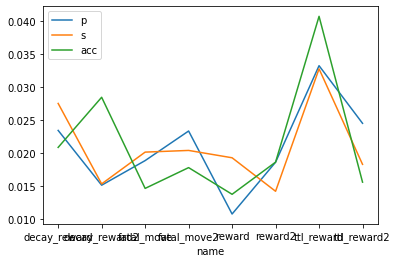

In [70]:
compare.groupby('name').std()[['p', 's', 'acc']].plot()

In [71]:
rewards_df = compare.groupby('name').mean()

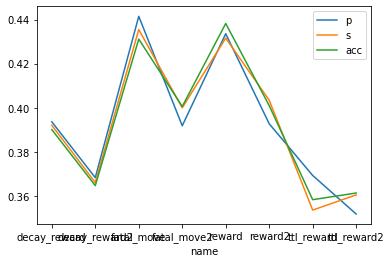

In [73]:
rewards_df[['p', 's', 'acc']].plot()

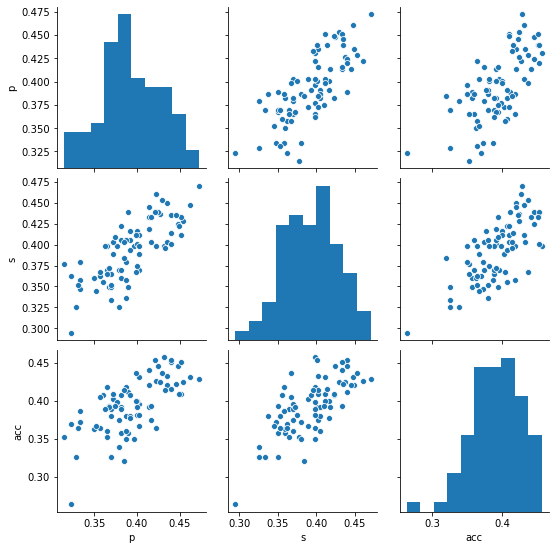

In [75]:
sns.pairplot(compare[['p', 's', 'acc']])

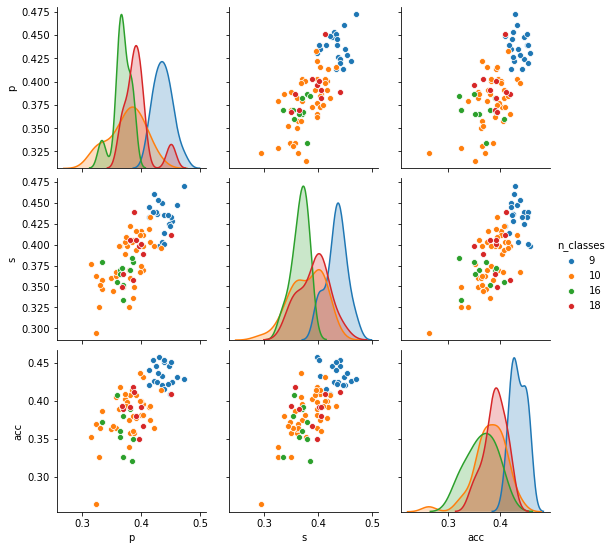

In [77]:
sns.pairplot(compare[['p', 's', 'acc', 'n_classes']], hue='n_classes')

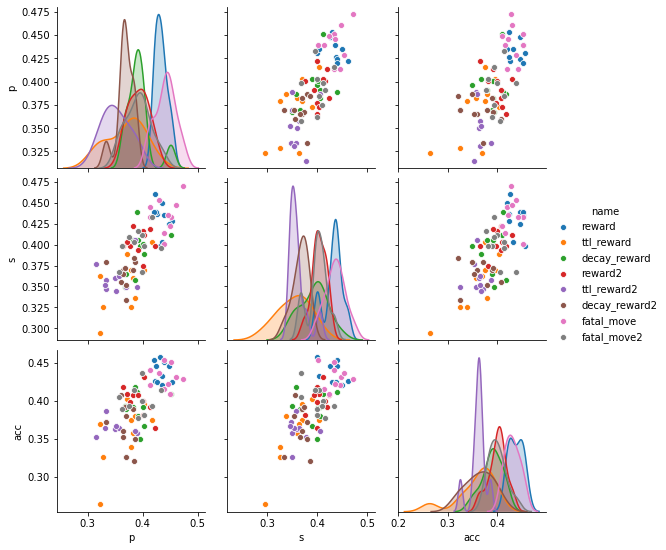

In [79]:
sns.pairplot(compare[['p', 's', 'acc', 'name']], hue='name')
plt.show()

TypeError: 'Figure' object is not callable

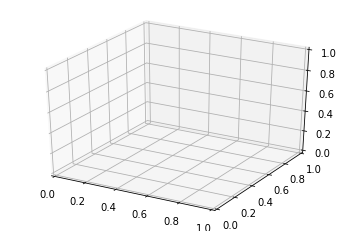

In [116]:
fig, axs = plt.subplots(1,1,subplot_kw=dict(projection='3d'))
fig(figsize=(12,10))

In [136]:
colors = ['red, darkgreen', 'darkblue', 'yellow', 'purple', 'pink', 'brown', 'lightblue', 'lightgreen', 'black']

In [141]:
colors = np.random.rand(15)

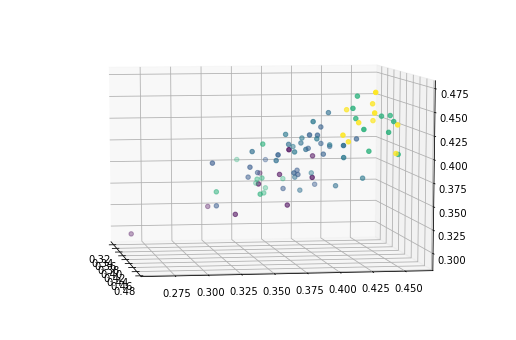

In [143]:
for angle in range(1,360,10):
        
    names_c =compare.name.unique().tolist()
    
    fig, axs = plt.subplots(1,1,figsize=(9,6), subplot_kw=dict(projection='3d'))
    axs.scatter(compare.p, compare.acc, compare.s, c=[colors[names_c.index(name)] for name in compare.name])
    
    axs.view_init(8, angle)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    
    

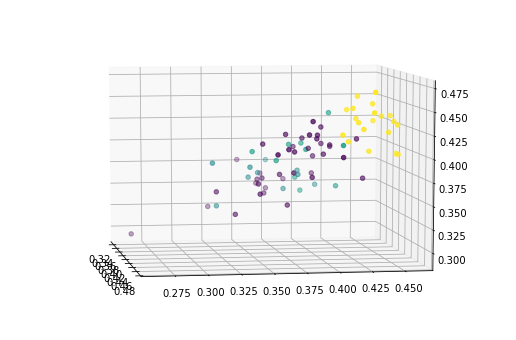

In [144]:
for angle in range(1,360,10):
        
    names_c =compare.n_classes.unique().tolist()
    
    fig, axs = plt.subplots(1,1,figsize=(9,6), subplot_kw=dict(projection='3d'))
    axs.scatter(compare.p, compare.acc, compare.s, c=[colors[names_c.index(name)] for name in compare.n_classes])
    
    axs.view_init(8, angle)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    
    

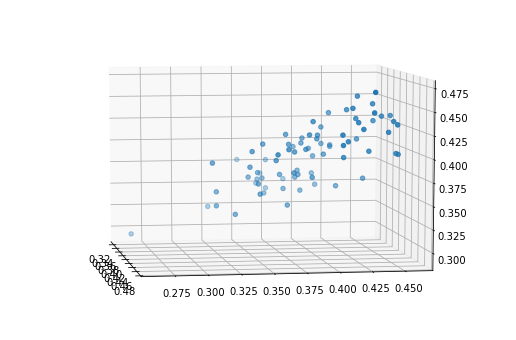

In [131]:
for angle in range(1,360,10):
    
    fig, axs = plt.subplots(1,1,figsize=(9,6), subplot_kw=dict(projection='3d'))
    axs.scatter(compare.p, compare.acc, compare.s)
    
    axs.view_init(8, angle)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    
    

In [ ]:
fig, axs = plt.subplots

## Names result

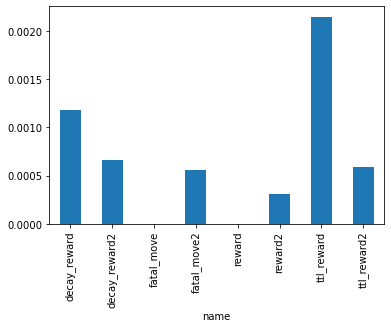

In [80]:
compare.groupby('name').std().iloc[:,3:-1].mean(axis=1).plot.bar()

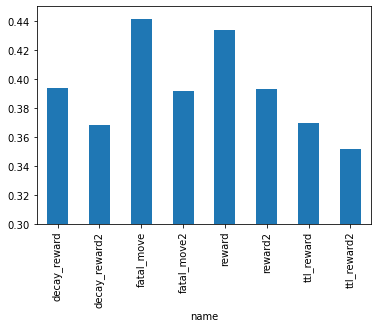

In [88]:
compare.groupby('name').mean()['p'].plot.bar(ylim=(0.3, 0.45))

## n classes result

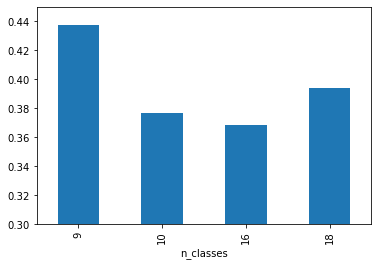

In [93]:
compare.groupby('n_classes').mean()['p'].plot.bar(ylim=(0.3,0.45))

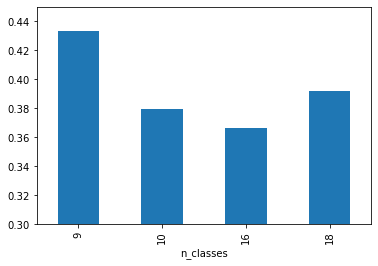

In [96]:
compare.groupby('n_classes').mean()['s'].plot.bar(ylim=(0.3,0.45))

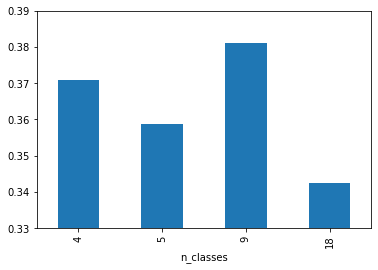

In [136]:
compare.groupby('n_classes').mean()['acc'].plot.bar(ylim=(0.33,0.39))

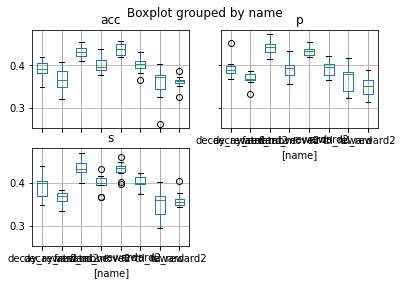

In [83]:
compare[['p', 's', 'acc', 'name']].boxplot(by='name',)

#plt.xticks(compare.name.unique().tolist(), compare.name.unique().tolist(), rotation=90)
plt.show()


C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

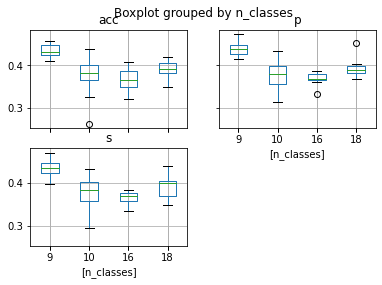

In [84]:
compare[['p', 's', 'acc', 'n_classes']].boxplot(by='n_classes')
plt.show()

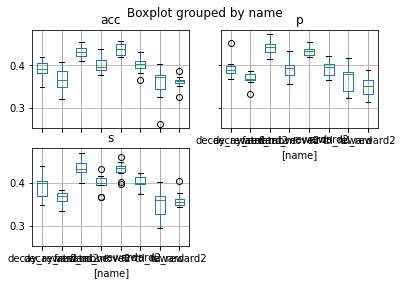

In [85]:
compare[['p', 's', 'acc', 'name']].boxplot(by='name')
plt.show()

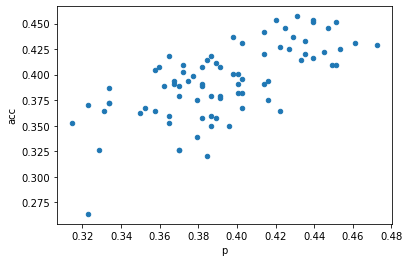

In [89]:
compare.plot.scatter('p', 'acc')

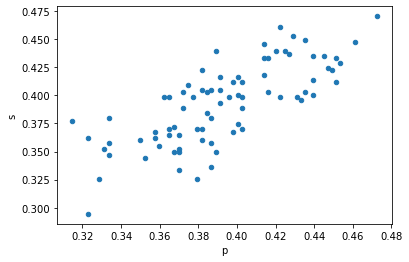

In [90]:
compare.plot.scatter('p', 's')

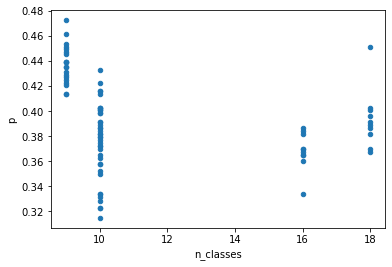

In [91]:
compare.plot.scatter('n_classes', 'p')

In [76]:
rewards_df

,p,s,acc,class - 0,class - 1,class - 2,class - 3,class - 4,class - 5,class - 6,class - 7,class - 8,class - 9,class - 10,n_classes
name,,,,,,,,,,,,,,,
decay_reward,0.393651,0.392060,0.390117,0.602606,0.943469,0.572766,0.000053,0.316705,0.253134,0.039271,0.0,0.000000,0.0,0.906714,18
decay_reward2,0.368331,0.366102,0.364715,0.816540,0.983636,0.000000,0.000000,0.002702,0.000000,0.285321,1.0,0.958767,NaN,NaN,16
fatal_move,0.441465,0.435478,0.431160,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
fatal_move2,0.391838,0.400017,0.400575,0.912431,0.573366,0.971369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
reward,0.433573,0.431595,0.438220,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
reward2,0.392765,0.403429,0.401003,0.996101,0.997878,0.971797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
ttl_reward,0.369319,0.353619,0.358336,0.691009,0.712160,0.671467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
ttl_reward2,0.351838,0.360494,0.361362,0.817498,0.972903,0.353359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


# Functions

In [30]:
def sizes_scores(xi, yi, num_eps=300, name='new_trial', n_samples=3, sample_intervals=8, keep=False, dfs_dict=False, seed=False, player='first', mode='classifier', pause=True):
    
    n_intervals = sample_intervals
    if keep==True and dfs_dict==False: pd.inconsistencia_do_keep
    if pause:
        if input('Type "exit" to leave')=='exit': pd.raiseerror
    
    scrs = []
    scrs_op = []
    cnt=0
    for proportion in np.linspace(0, 1, n_intervals+1)[1:]:

    #------------ Sampling and Model Training ---------------------

        cnt+=1
        sample_size = int(round( len(yi)*proportion, 0 ))

        clear_output(wait=True)
        print('Fitting to '+str(round(proportion, 2))+' of the data ('+str(sample_size)+' rows)...  ('+str(cnt)+'/'+str(n_intervals)+')')

        y = yi.sample(sample_size)
        x = xi.loc[y.index].copy()
        
        #if not seed: seed = np.random.rand(len(y))<0.8        
        et, acc, class_scrs = sample_model(x,y, seed=seed, verbose=0, n_jobs=-1, mode=mode, score=True)   #----- Extra Trees Model Function --------
        
        et.set_params(verbose=0)
                
        model_dict = play_model((et if player=='first' else 'random'), name, num_eps=num_eps, n_samples=n_samples, against=('random' if player=='first' else 'model'), opponent_model = ('random' if player=='first' else et))

    #---- Model Results -----
    
        player1 = model_dict[name]
        player2 = model_dict[name+' op']

        cols1 = player1.mean(axis=0).index.tolist()
        cols2 = player2.mean(axis=0).index.tolist()

        scrs.append([acc] + player1.mean(axis=0).tolist() + class_scrs)
        scrs_op.append([acc] + player2.mean(axis=0).tolist() + class_scrs)
     
    
    class_cols = ['acc - class '+str(y_uni) for y_uni in sorted(yi.unique())]

    scrs_df = pd.DataFrame(scrs, columns=['acc']+cols1+class_cols)
    scrs_op_df = pd.DataFrame(scrs_op, columns=['acc']+cols2+class_cols)
        
    if keep: 
        dfs_dict[name] = scrs_df
        dfs_dict[name+' op'] = scrs_op_df
        return dfs_dict
    else:
        dfs_dict = {}
        dfs_dict[name] = scrs_df
        dfs_dict[name+' op'] = scrs_op_df
        return dfs_dict
        

In [31]:
def sample_model(x, y, seed=False, verbose=0, n_jobs=-1, mode='classifier', score=False):
    
    msk = np.random.rand(len(y))<0.8

    if type(seed)!=bool: msk = seed
    x_train, x_test, y_train, y_test = x[msk], x[~msk], y[msk], y[~msk]

    #rf = rfr(n_estimators=50)
    #bg = BaggingRegressor(n_estimators=50)

    if mode=='classifier': 
        et = etc(verbose=verbose, n_estimators=1, n_jobs=n_jobs)
    else: 
        et = etr(verbose=verbose, n_estimators=1, n_jobs=n_jobs)
    
    #et.set_params(n_estimators=10)
    et.fit(x_train,y_train)
    
    if score:
        if mode=='classifier':
            acc = acc_scr(y_test, et.predict(x_test))
            class_acc = [acc_scr(y_test[y_test==y_uni], et.predict(x_test[(y_test==y_uni).values])) for y_uni in sorted(y_test.unique())]
        else:
            acc = r2_score(y_test, et.predict(x_test))
            class_acc = [r2_score(y_test[y_test==y_uni], et.predict(x_test[(y_test==y_uni).values])) for y_uni in sorted(y_test.unique())]
        
            
            
    if score: return et, acc, class_acc
    else: return et

In [ ]:
def play_models(x, yi, names, score, num_eps, times, stats=None, stats_dict=None, kee=False, against='random', opponent_model='random'):
    
    for 

In [32]:
def play_model(et, name, n_games=1000, n_samples=1, mode='simple', stats=None, stats_dict=None, keep=False, against='random', opponent_model='random'):
    
    num_eps = n_games
    if et!= 'random': et.set_params(verbose=0)
    if opponent_model=='same': opponent_model = et    
    if opponent_model!='random': opponent_model.set_params(verbose=0)

    num_eps_old = 1
    num_eps = num_eps + num_eps_old
    if stats==None: 
        stats = []
        stats_op = []
    for sample in range(n_samples):

        memory1 = []
        memory1_op = []
        num_eps_old = 1
        scrs=[]
        num_eps = num_eps

        for ep in range(num_eps_old, num_eps):

            clear_output(wait=True)
            if ep in range(num_eps_old, num_eps, int(num_eps/40)+1): 
                print('iteration: ', str(sample+1)+'/'+str(n_samples), ' -  games: ', str(ep)+'/'+str(num_eps), '   ('+name+')')

            table = np.array([[0,0,0], [0,0,0], [0,0,0]])
            table_flat = table.ravel().tolist()

            ep_memory = []
            ep_memory_op = []
                        
            play_cnt = 0
            obs = []
            winner=0
            reward=0
            reward_op = 0
            action_history = []
            action1, action2 = 0, -1

            first_round = 1
            player = 0

            done=False
            while not done:

            #-------- Action 1 ------------

                if et!='random':

                    play_cnt+=1

                    obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                    pred_in = [[play_cnt, obs, i, action2, first_round, player] for i in range(9)]       

                    action1 = np.argmax(et.predict(pred_in))

                    choice_cnt=0
                    while action1 in action_history+[9]:
                        action1 = pd.Series(et.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                        choice_cnt+=1
                                        
                    
                    action_history.append(action1)       
                    table_flat[action1]='o'
                    
                    
            #-------------------------------------------------------

                if et=='random':
                    
                    action1 = int(np.random.sample()*10)
                    while action1 in action_history+[9]:
                        action1 = int(np.random.sample()*10)

                    action_history.append(action1)
                    table_flat[action1]='o' 
                    play_cnt+=1


            #---------------- Checking victory -------------------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['o', 'o', 'o']) or (table[:, i].tolist()==['o', 'o', 'o']) or (np.diag(table).tolist()==['o', 'o', 'o']) or (np.diag(table.T).tolist()==['o', 'o', 'o']):
                        winner='o'
                        done=True 
                        reward=1


        #        ep_memory.append([ep, play_cnt, obs, action1, reward])

                ep_memory_op.append([ep, reward_op])                                    
                ep_memory.append([ep, reward])
                if 0 not in table_flat or reward==1: break

                first_round = 0
                player = 1

                    
                    
            #------------------------------ Action 2 ---------------------------------------


                if against=='human':

                    print(table)
                    action2 = int(input())
                    if action2=='exit': break

                    action_history.append(action2)
                    table_flat[action2]='x' 

                if against=='random':
                
                    action2 = int(np.random.sample()*10)
                    while action2 in action_history+[9]:
                        action2 = int(np.random.sample()*10)

                    action_history.append(action2)
                    table_flat[action2]='x' 

                if against=='model':
                                        
                    obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                    pred_in = [[play_cnt, obs, i, action1, first_round, player] for i in range(9)]       

                    action2 = np.argmax(opponent_model.predict(pred_in))

                    choice_cnt=0
                    while action2 in action_history:
                        action2 = pd.Series(opponent_model.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                        choice_cnt+=1

                    action_history.append(action2)       
                    table_flat[action2]='x'

            #---------------------------------------------------------------- Checking victory condition --------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['x', 'x', 'x']) or (table[:, i].tolist()==['x', 'x', 'x']) or (np.diag(table).tolist()==['x','x','x']) or (np.diag(table.T).tolist()==['x', 'x', 'x']):
                        winner='x'
                        reward_op = 1
                        done=True

                ep_memory.append([ep, reward])                        
                ep_memory_op.append([ep, reward_op])                
                player = 0
                
                if 0 not in table_flat: break

        #------------ Total and Decay Rewards ------------

            #for i, row in enumerate(ep_memory):

             #   ep_memory[i].append(reward)
              #  ep_memory[i].append(reward*i/len(ep_memory))

            memory1.extend(ep_memory)
            memory1_op.extend(ep_memory_op)
            
        #----- Plotting ----------

            if mode=='plot':

                scrs.append([ep, pd.DataFrame(memory1, columns=['ep', 'reward']).groupby('ep').sum()['reward'].mean()])
                pd.DataFrame(scrs, columns=['ep', 'acc']).set_index('ep').plot()
                plt.grid()
                plt.show()
                plt.pause(0.001)

        #---------- Dataframe Conversion ---------------

        num_eps_old = ep+1

        #memory1_df = pd.DataFrame(memory1, columns=['ep', 'round', 'obs', 'action', 'reward', 'ttl_reward', 'decay_reward'])     
        memory1_df = pd.DataFrame(memory1, columns=['ep', 'reward'])     
        memory1_op_df = pd.DataFrame(memory1_op, columns=['ep', 'reward'])     

        
        ep_df = memory1_df.groupby('ep').sum()
        ep_df_op = memory1_op_df.groupby('ep').sum() 
        
        u = ep_df.mean()[0] * len(ep_df)
        p = ep_df.mean()[0]
        n = len(ep_df)
        s = ep_df.std()[0]
        stats.append([p, s, n, u])

        u_op = ep_df_op.mean()[0] * len(ep_df_op)
        p_op = ep_df_op.mean()[0]
        n_op = len(ep_df_op)
        s_op = ep_df_op.std()[0]
        stats_op.append([p_op, s_op, n_op, u_op])

        #print(times)

    stats_df = pd.DataFrame(stats, columns=['p', 's', 'n', 'u'])
    stats_op_df = pd.DataFrame(stats_op, columns=['p', 's', 'n', 'u'])
    
    if stats_dict!= None:        
        stats_dict['player1'] = stats_df
        stats_dict['player2'] = stats_op_df
        
    else:
        stats_dict={}
        stats_dict['player1'] = stats_df
        stats_dict['player2'] = stats_op_df
        
    if keep:
        return  stats_dict, stats, stats_op
    else:
        return stats_dict

In [ ]:
def sample_size_score(xi, yi, name, n_intervals=8, keep=False, reuse=False, size_scrs=False, size_dict=False):

    if keep==True and size_dict==False: pd.inconsistencia_do_keep
    
    if reuse==False: size_scrs = []

    cnt=0

    for proportion in np.linspace(0.01, 1, n_intervals+1):

        clear_output(wait=True)
        
        cnt+=1
        sample_size = int(round( len(yi)*proportion, 0 ))
        print('Fitting to '+str(round(proportion, 2))+' sample of the data ('+str(sample_size)+' rows)...  ('+str(cnt)+'/'+str(n_intervals)+')')

        y = yi.sample(sample_size)
        x = xi.loc[y.index].copy()
        #y = pd.Series(le().fit_transform(y), index=y.index)    

        msk_new = np.random.rand(len(y))<0.8
        msk = msk_new
        x_train, x_test, y_train, y_test = x[msk], x[~msk], y[msk], y[~msk]

        #et = etr(n_estimators=50)
        #rf = rfr(n_estimators=50)
        #bg = BaggingRegressor(n_estimators=50)

        et = etc(verbose=0, n_estimators=1)
        et.fit(x_train,y_train)

        clear_output(wait=True)
    #    print('Predicting and Scoring ('+str(cnt)+'/'+str(n_intervals+1)+')')
        size_scr = acc_scr(y_test, et.predict(x_test))
        class_scrs = [acc_scr(y_test[y_test==y_uni], et.predict(x_test[(y_test==y_uni)])) for y_uni in sorted(y_test.unique())]


        size_scrs.append([proportion, sample_size, size_scr]+class_scrs)

    #-----------
    
    size_df = pd.DataFrame(size_scrs, columns=['p', 'sample_size', 'acc']+['acc - class '+str(y_uni) for y_uni in sorted(y_test.unique())])
    if keep: size_dict[name] = size_df
    
    print('Done!')
    
    if keep: return size_dict
    else: return size_df

In [ ]:
y.value_counts()

In [ ]:
def main_category_size_score(x, y, num_iter=10, num_eps=1000, split=1, mode='simple', keep=False):

    num_eps_old = 1

    #num_eps = int(input('Number of mathes per iteration: ')) + num_eps_old
    #split = input('Choose test values ("1" for equally spaced, "2" for quadratically spaced): ')
    #mode = input('Type "plot" to visualize victory proportion in real time: ')
    #keep = input('Want to reuse the set? ')
    if input('Type "exit" to leave')=='exit': pd.levantaoerro
    
    ep=0

    categ_len = len(y[y==y.value_counts().sort_values().index[-1]])
    sizes = (list(np.arange(categ_len/10,
                            categ_len,
                            int((categ_len - categ_len/10)/num_iter))) if split != 2 else [3300000/(1.175**i) for i in range(1,30)])

    if not keep: stats = []
    
    
    for sample_size in sizes:

        yfi = pd.concat([y[y==y.value_counts().sort_values().index[-1]].sample(int(sample_size)), y[y!=y.value_counts().sort_values().index[-1]]], axis=0)
        xf = x.loc[yfi.index]
        yf = pd.Series(le().fit_transform(yfi), index = yfi.index)

        clear_output(wait=True)
        print('iteration: ', str(sizes.index(sample_size)+1)+'/'+str(len(sizes)), ' -  games: ', str(0)+'/'+str(num_eps), ' -  Training Random Extra Trees Model...')

        msk_new = np.random.rand(len(yf))<0.8
        msk = msk_new
        x_train, x_test, y_train, y_test = xf[msk], xf[~msk], yf[msk], yf[~msk]

        #et = etr(n_estimators=50)
        #rf = rfr(n_estimators=50)
        #bg = BaggingRegressor(n_estimators=50)

        et = etc(verbose=0, n_jobs=-1, n_estimators=1)
        #et.set_params(n_estimators=10)
        et.fit(x_train, y_train)
        acc = acc_scr(y_test, et.predict(x_test))
        class_acc = [acc_scr(y_test[y_test==y_uni], et.predict(x_test[(y_test==y_uni)])) for y_uni in sorted(y_test.unique())]

    #---------   Jogo da Velha ---------------------

        memory1 = []
        num_eps_old = 1

        scrs=[]

        num_eps = num_eps
        for ep in range(num_eps_old, num_eps):

            clear_output(wait=True)
            if ep in range(num_eps_old, num_eps, int(num_eps/40)+1): print('iteration: ', str(sizes.index(sample_size)+1)+'/'+str(len(sizes)), ' -  games: ', str(ep+1)+'/'+str(num_eps), ' -  Testing Model...')

            table = np.array([[0,0,0], [0,0,0], [0,0,0]])
            table_flat = table.ravel().tolist()

            ep_memory = []

            play_cnt = 0
            obs = []
            winner=0
            reward=0
            action_history = []
            action1, action2 = 0, -1

            done=False
            while not done:

            #-------- Action 1 ------------

                play_cnt+=1
                #obs = le_obj.transform(np.array([(int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)]))[0]   
                #obs = (int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)   
                obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                pred_in = [[play_cnt, obs, i, action2] for i in range(9)]       

            #------

                action1 = np.argmax(et.predict(pred_in))

                choice_cnt=0
                while action1 in action_history+[9]:
                    action1 = pd.Series(et.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                    choice_cnt+=1

                action_history.append(action1)       
                table_flat[action1]='o'

            #-------------------------------------------------------

                #action1 = int(np.random.sample()*10)
                #while action1 in action_history+[9]:
                 #   action1 = int(np.random.sample()*10)

                #action_history.append(action1)
                #table_flat[action1]='o' 
                #play_cnt+=1

            #---------------- Checking victory -------------------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['o', 'o', 'o']) or (table[:, i].tolist()==['o', 'o', 'o']) or (np.diag(table).tolist()==['o', 'o', 'o']) or (np.diag(table.T).tolist()==['o', 'o', 'o']):
                        winner='o'
                        done=True 
                        reward=1

                #print(table)
                #print('winner', winner)
                #print('done', done)
                #print('reward', reward)
                #if input()=='exit': break
                #clear_output(wait=True)

        #        ep_memory.append([ep, play_cnt, obs, action1, reward])
                ep_memory.append([ep, reward])

                if 0 not in table_flat or reward==1: break

            #------------------------------ Action 2 ---------------------------------------

                #print(table)
                #action2 = int(input())
                #if action2=='exit': break

                action2 = int(np.random.sample()*10)
                while action2 in action_history+[9]:
                    action2 = int(np.random.sample()*10)

                action_history.append(action2)
                table_flat[action2]='x' 
                play_cnt+=1

            #---------------------------------------------------------------------------

                #play_cnt+=1
                #obs = le_obj.transform(np.array([(int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)]))[0]   
                #obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                #pred_in = [[play_cnt, obs, i] for i in range(9)]       

                #action2 = np.argmax(et.predict(pred_in))

                #choice_cnt=0
                #while action2 in action_history:
                 #   action2 = pd.Series(et.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                  #  choice_cnt+=1
                #if action1 != np.argmax(et.predict(pred_in)): random_cnt+=1

                #action_history.append(action2)       
                #table_flat[action2]='x'

            #---------------------------------------------------------------- Checking victory condition --------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['x', 'x', 'x']) or (table[:, i].tolist()==['x', 'x', 'x']) or (np.diag(table).tolist()==['x','x','x']) or (np.diag(table.T).tolist()==['x', 'x', 'x']):
                        winner='x'
                        done=True

                if 0 not in table_flat: break

        #------------ Total and Decay Rewards ------------

            #for i, row in enumerate(ep_memory):

             #   ep_memory[i].append(reward)
              #  ep_memory[i].append(reward*i/len(ep_memory))

            memory1.extend(ep_memory)

        #----- Plotting ----------

            if mode=='plot':

                scrs.append([ep, pd.DataFrame(memory1, columns=['ep', 'reward']).groupby('ep').sum()['reward'].mean()])
                pd.DataFrame(scrs, columns=['ep', 'acc']).set_index('ep').plot()
                plt.grid()
                plt.show()
                plt.pause(0.001)

        #---------- Dataframe Conversion ---------------

        num_eps_old = ep+1

        #memory1_df = pd.DataFrame(memory1, columns=['ep', 'round', 'obs', 'action', 'reward', 'ttl_reward', 'decay_reward'])     
        memory1_df = pd.DataFrame(memory1, columns=['ep', 'reward'])     

        u = memory1_df.groupby('ep').sum().mean()[0] * len(memory1_df.groupby('ep').sum())
        p = memory1_df.groupby('ep').sum().mean()[0]
        n = len(memory1_df.groupby('ep').sum())
        s = memory1_df.groupby('ep').sum().std()[0]
        stats.append([int(sample_size), p, s, n, u, acc]+class_acc)

        #print(times)

    stats_df = pd.DataFrame(stats, columns=['sample_size', 'p', 's', 'n', 'u', 'acc']+['acc - class '+str(y_uni) for y_uni in sorted(y_test.unique())])
    print('Done!')
    
    if keep: return stats_df, stats
    else: return stats_df

In [ ]:
def sample_play_score(xi, yi, num_eps=1, name='new_scr_df', n_intervals=8, keep=False, dfs_dict=False):

    if keep==True and dfs_dict==False: pd.inconsistencia_do_keep
    cnt=0

    mode = 'Not plotting'
    if input('Type "exit" to leave')=='exit': pd.raiseerror

    size_scrs = []
    cnt=0

    for proportion in np.linspace(0, 1, n_intervals+1)[1:]:

    #------------ Sampling and Model Training ---------------------

        cnt+=1
        sample_size = int(round( len(yi)*proportion, 0 ))

        y = yi.sample(sample_size)
        x = xi.loc[y.index].copy()
        y = pd.Series(le().fit_transform(y), index=y.index)    

        msk = np.random.rand(len(y))<0.8
        x_train, x_test, y_train, y_test = x[msk], x[~msk], y[msk], y[~msk]

        #et = etr(n_estimators=50)
        #rf = rfr(n_estimators=50)
        #bg = BaggingRegressor(n_estimators=50)

        et = etc(verbose=0, n_estimators=1)
        et.fit(x_train,y_train)
        
        size_scr = acc_scr(y_test, et.predict(x_test))
        class_scrs = [acc_scr(y_test[y_test==y_uni], et.predict(x_test[(y_test==y_uni)])) for y_uni in sorted(y_test.unique())]

        clear_output(wait=True)
        print('Fitting to '+str(round(proportion, 2))+' of the data ('+str(sample_size)+' rows)...  ('+str(cnt)+'/'+str(n_intervals+1)+')')

    #--------- Playing -------------------------------------------


        memory1 = []
        num_eps_old = 1
        scrs=[]

        num_eps = num_eps
        for ep in range(num_eps_old, num_eps):

            clear_output(wait=True)
            if ep in range(num_eps_old, num_eps, int(num_eps/40)+1): print('iteration: ', str(cnt)+'/'+str(n_intervals+1), ' -  games: ', str(ep)+'/'+str(num_eps), '  ('+str(cnt)+'/'+str(n_intervals+1)+')

            table = np.array([[0,0,0], [0,0,0], [0,0,0]])
            table_flat = table.ravel().tolist()

            ep_memory = []

            play_cnt = 0
            obs = []
            winner=0
            reward=0
            action_history = []
            action1, action2 = 0, -1

            done=False
            while not done:

            #-------- Action 1 ------------

                play_cnt+=1
                #obs = le_obj.transform(np.array([(int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)]))[0]   
                #obs = (int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)   
                obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                pred_in = [[play_cnt, obs, i, action2] for i in range(9)]       

            #------

                action1 = np.argmax(et.predict(pred_in))

                choice_cnt=0
                while action1 in action_history+[9]:
                    action1 = pd.Series(et.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                    choice_cnt+=1

                action_history.append(action1)       
                table_flat[action1]='o'

            #-------------------------------------------------------

                #action1 = int(np.random.sample()*10)
                #while action1 in action_history+[9]:
                 #   action1 = int(np.random.sample()*10)

                #action_history.append(action1)
                #table_flat[action1]='o' 
                #play_cnt+=1


            #---------------- Checking victory -------------------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['o', 'o', 'o']) or (table[:, i].tolist()==['o', 'o', 'o']) or (np.diag(table).tolist()==['o', 'o', 'o']) or (np.diag(table.T).tolist()==['o', 'o', 'o']):
                        winner='o'
                        done=True 
                        reward=1


                #print(table)
                #print('winner', winner)
                #print('done', done)
                #print('reward', reward)
                #if input()=='exit': break
                #clear_output(wait=True)


        #        ep_memory.append([ep, play_cnt, obs, action1, reward])
                ep_memory.append([ep, reward])

                if 0 not in table_flat or reward==1: break

            #------------------------------ Action 2 - Random ---------------------------------------


                #print(table)
                #action2 = int(input())
                #if action2=='exit': break

                action2 = int(np.random.sample()*10)
                while action2 in action_history+[9]:
                    action2 = int(np.random.sample()*10)

                action_history.append(action2)
                table_flat[action2]='x' 
                play_cnt+=1

            #------------------------------- Action 2 - Model --------------------------------------------

                #play_cnt+=1
                #obs = le_obj.transform(np.array([(int(''.join([str(j) for j in action_history[1:][:-1]])) if len(action_history)!=1 else 0)]))[0]   
                #obs = (int(''.join([str(j) for j in action_history])) if len(action_history)!=0 else 0)   
                #pred_in = [[play_cnt, obs, i] for i in range(9)]       

                #action2 = np.argmax(et.predict(pred_in))

                #choice_cnt=0
                #while action2 in action_history:
                 #   action2 = pd.Series(et.predict(pred_in)).sort_values(ascending=False).index[choice_cnt]
                  #  choice_cnt+=1
                #if action1 != np.argmax(et.predict(pred_in)): random_cnt+=1

                #action_history.append(action2)       
                #table_flat[action2]='x'

            #---------------------------------------------------------------- Checking victory condition --------------

                table = np.array(table_flat).reshape(3,3)

                for i in range(3):
                    if (table[i].tolist()==['x', 'x', 'x']) or (table[:, i].tolist()==['x', 'x', 'x']) or (np.diag(table).tolist()==['x','x','x']) or (np.diag(table.T).tolist()==['x', 'x', 'x']):
                        winner='x'
                        done=True

                if 0 not in table_flat: break

        #------------ Total and Decay Rewards ------------

            #for i, row in enumerate(ep_memory):

             #   ep_memory[i].append(reward)
              #  ep_memory[i].append(reward*i/len(ep_memory))

            memory1.extend(ep_memory)

        #----- Plotting ----------

            if mode=='plot':

                scrs.append([ep, pd.DataFrame(memory1, columns=['ep', 'reward']).groupby('ep').sum()['reward'].mean()])
                pd.DataFrame(scrs, columns=['ep', 'acc']).set_index('ep').plot()
                plt.grid()
                plt.show()
                plt.pause(0.001)

        #---------- Dataframe Conversion ---------------


        num_eps_old = ep+1

        #memory1_df = pd.DataFrame(memory1, columns=['ep', 'round', 'obs', 'action', 'reward', 'ttl_reward', 'decay_reward'])     
        memory1_df = pd.DataFrame(memory1, columns=['ep', 'reward'])     

        u = memory1_df.groupby('ep').sum().mean()[0] * len(memory1_df.groupby('ep').sum())
        p = memory1_df.groupby('ep').sum().mean()[0]
        n = len(memory1_df.groupby('ep').sum())
        s = memory1_df.groupby('ep').sum().std()[0]

        size_scrs.append([proportion, sample_size, size_scr, p, s, n, u]+class_scrs)

    #------------------------------------------------------------------------------------------------------------------------------------

    size_df = pd.DataFrame(size_scrs, columns=['proportion', 'sample_size', 'acc', 'p', 's', 'n', 'u']+['acc - class '+str(y_uni) for y_uni in sorted(y_test.unique())])
    if not keep: dfs_dict = {}
    
    dfs_dict[name] = size_df

    print('Done!')

    return dfs_dict

# Comparing Reward Systems

In [13]:
#stats_dict = {}

In [131]:
a = memory_df['reward']
b = memory_df['ttl_reward']
c =  memory_df['decay_reward']
d = memory_df['reward2']
e = memory_df['ttl_reward2']
f =  memory_df['decay_reward2']
g =  memory_df['fatal_move']
h =  memory_df['fatal_move2']

In [144]:
x = memory_df[['round', 'obs', 'action', 'action2']]
#x = memory_df[['round', 'obs', 'action', 'action2', 'fatal_move', 'fatal_move2', 'player']]

In [107]:
#  win_rate = 0.9567
name = '+-a+b*c'

y = a  + (b * c) - d - (e * f)    
y = pd.Series(le().fit_transform(y))

In [157]:
#  win_rate = 0.9288
name='reward+decay'

y = a  + c
y = pd.Series(le().fit_transform(y))

In [118]:
#  win_rate = 0.9288
name='+-reward+-decay'

y = a + c - d - f
y = pd.Series(le().fit_transform(y))

In [204]:
#  win_rate = 0.9724
name='reward+ttl'

y = a  + b
y = pd.Series(le().fit_transform(y), index=y.index)

In [ ]:
name = 'rew+ttl-fatal'

y = a + b - g
y = pd.Series(le().fit_transform(y))

In [ ]:
name = 'rew+ttl-fatal'

y = a + b - g
y = pd.Series(le().fit_transform(y))

In [173]:
name = 'rew-fatal'

y = a - g
y = pd.Series(le().fit_transform(y))

In [186]:
y.value_counts()

0    4454388
1    3860758
2     595297
dtype: int64

In [182]:
names.append(name)

In [183]:
names

['+-a+b*c', 'reward+decay', 'reward+ttl', 'rew+ttl-fatal', 'rew-fatal']

In [393]:
rewards = {name1:y1, name2:y2, name3:y3, name4:y4, name5:y5, name6:y6, name7:y7, name8:y8}

rewards = {key:pd.Series(le().fit_transform(y_i), index=y_i.index) for key, y_i in zip(rewards.keys(), rewards.values())}

names = [key for key in rewards.keys()]

y_enc = [yi for yi in rewards.values()]

In [398]:
x = memory_df[['round', 'obs', 'action', 'action2']]
#x = memory_df[['round', 'obs', 'action', 'action2', 'fatal_move', 'fatal_move2', 'player']]

# Modeling

In [395]:
#msk = np.random.rand(len(y))<0.8

In [207]:
et = sample_model(x, y, seed=msk)

stats_df, stats_dict = play_model(et, stats_dict, name, times=10, num_eps=1000)

In [396]:
#categ_dict = {}

In [399]:
for name, yi in zip(names, y_enc):

    et = sample_model(x, yi, seed=msk)
    categ_dict = play_model(et, name, stats_dict=categ_dict, times=10, num_eps=1000)

iteration:  9/10  -  games:  989/1001


In [415]:
len(categ_dict)

8

# Plotting

In [424]:
categ_dict[names[0]]

,p,s,n,u,name
0,0.965,0.183872,1000,965.0,+-a+b*c
1,0.961,0.193692,1000,961.0,+-a+b*c
2,0.951,0.215976,1000,951.0,+-a+b*c
3,0.966,0.181320,1000,966.0,+-a+b*c
4,0.967,0.178726,1000,967.0,+-a+b*c
5,0.961,0.193692,1000,961.0,+-a+b*c
6,0.965,0.183872,1000,965.0,+-a+b*c
7,0.957,0.202959,1000,957.0,+-a+b*c
8,0.956,0.205198,1000,956.0,+-a+b*c
9,0.961,0.193692,1000,961.0,+-a+b*c


In [416]:
{name:categ_dict[name]['p'].mean() for name in names}

{'+-a+b*c': 0.961,
 'reward+decay': 0.9258,
 '+-reward+-decay': 0.9532,
 'reward+ttl': 0.9446,
 'rew+ttl-fatal': 0.9493,
 'rew-fatal': 0.8362999999999999,
 '+-a+b*c - g': 0.9570000000000001,
 'a+c-f-g': 0.9610999999999998}

In [417]:
copy = categ_dict.copy()

In [418]:
for name in names:
    copy[name]['name']=name

In [419]:
results = pd.concat([copy[name] for name in names], axis=0)

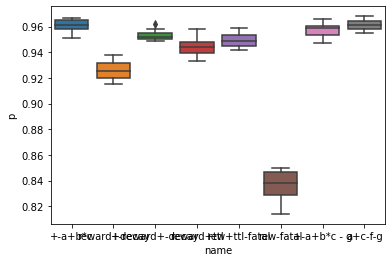

In [420]:
sns.boxplot(data=results, x='name', y='p')

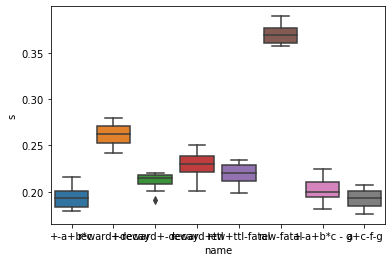

In [421]:
sns.boxplot(data=results, x='name', y='s')

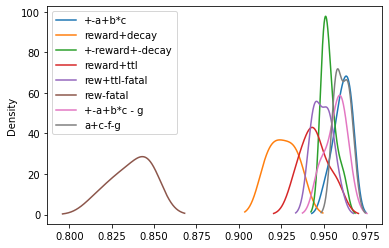

In [422]:
for name in names:
    results[results['name']==name]['p'].plot.kde()
plt.legend(names)

# Comparing Sample Size Accuracy

In [365]:
memory_df.decay_reward.unique()

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 0.28571429,
       0.57142857, 0.85714286, 1.14285714, 1.42857143, 1.71428571,
       0.4       , 0.8       , 1.2       , 1.6       ])

# Scoring

In [297]:
#size_dict = {}

In [301]:
for i in range(len(rewards)):
    
    size_dict = sample_size_score(x, y_enc[i], names[i], keep=True, size_dict=size_dict)
    print(i)
    

Done!


# Evaluating

In [277]:
size_df

,p,sample_size,acc,acc - class 0,acc - class 1,acc - class 2,acc - class 3,acc - class 4,acc - class 5,acc - class 6,...,acc - class 20,acc - class 21,acc - class 22,acc - class 23,acc - class 24,acc - class 25,acc - class 26,acc - class 27,acc - class 28,acc - class 29
0,0.010,89104,0.411584,0.418033,0.219780,0.272021,0.230303,0.223140,0.231834,0.291777,...,0.230263,0.256513,0.248521,0.094059,0.292576,0.332721,0.409639,0.455882,0.484962,0.585216
1,0.208,1853372,0.525511,0.703041,0.957016,0.567294,0.300390,0.480290,0.217088,0.230247,...,0.254056,0.329317,0.442739,0.065926,0.450555,0.408259,0.630723,1.000000,0.803842,0.820170
2,0.406,3617640,0.553230,0.823736,0.996571,0.667034,0.244561,0.470445,0.209093,0.237434,...,0.258151,0.337879,0.510875,0.059301,0.500357,0.473811,0.757515,1.000000,0.925940,0.893864
3,0.604,5381908,0.567052,0.886897,1.000000,0.697087,0.230431,0.467806,0.201895,0.225822,...,0.254806,0.331054,0.532537,0.053293,0.526503,0.499904,0.848377,1.000000,0.971180,0.933927
4,0.802,7146175,0.574115,0.929964,1.000000,0.707860,0.205585,0.458491,0.203751,0.234910,...,0.266814,0.335901,0.534717,0.032545,0.536063,0.527479,0.909491,1.000000,0.988920,0.958314
5,1.000,8910443,0.579934,0.957235,1.000000,0.709351,0.197636,0.458429,0.198638,0.236666,...,0.262501,0.342293,0.543612,0.032057,0.544968,0.541468,0.945342,1.000000,0.995746,0.974377


In [315]:
p=-1

In [324]:
p+=1
size_dict[names[p]].iloc[:].plot(x='p', y='acc', marker='o')

IndexError: list index out of range

In [325]:
class_cols = size_df.columns[3:]

In [388]:
p=-1

In [374]:
size_dict['rew-fatal']

,p,sample_size,acc,acc - class 0,acc - class 1,acc - class 2
0,0.01000,89104,0.899524,0.247706,0.950128,0.506087
1,0.13375,1191772,0.942416,0.368196,0.973694,0.781092
2,0.25750,2294439,0.955913,0.419581,0.980614,0.869098
3,0.38125,3397106,0.963201,0.453919,0.984253,0.913139
4,0.50500,4499774,0.967796,0.468485,0.986666,0.943367
5,0.62875,5602441,0.970459,0.480322,0.987561,0.964712
6,0.75250,6705108,0.972050,0.482619,0.988489,0.975159
7,0.87625,7807776,0.973108,0.485057,0.988913,0.983579
8,1.00000,8910443,0.973599,0.480275,0.989305,0.988662


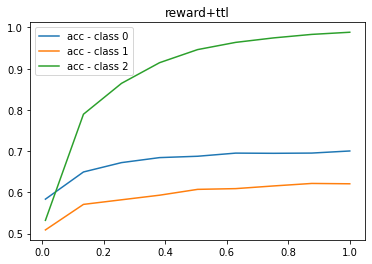

In [392]:
p+=1
class_cols = size_dict[names[p]].columns[3:]
plt.plot(size_dict[names[p]]['p'], size_dict[names[p]][class_cols])
plt.title(names[p])
plt.legend(class_cols)
plt.show()

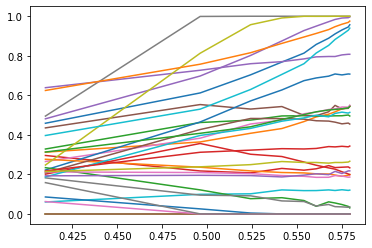

In [171]:
plt.plot(size_df['acc'], size_df[class_cols])
plt.show()

In [194]:
index = [i[-2:] for i in size_df.columns[size_df.mean()>0.77]][1:]

In [198]:
[sorted(yi.unique())[int(i)] for i in index]

[0.0, 1.4285714285714286, -0.5, -2.666666666666667, 0.8888888888888888, 0.4]

In [ ]:
size_df[yi.isin()]

# Evaluating Main Category Size Impact

In [498]:
for i in range(len(names[4:])):
    
    top_dict[names[i]] = main_category_size_score(x, y_enc[i], num_iter=8, num_eps=1000, split=1)

Done!


Type "exit" to leave exit


AttributeError: module 'pandas' has no attribute 'levantaoerro'

In [499]:
[top_dict[names[o]]['p'].mean() for o in [0,1]]

[0.9512846179512846, 0.9347124902680459]

In [482]:
class_cols_top = top_dict[names[1]].columns.tolist()[6:]

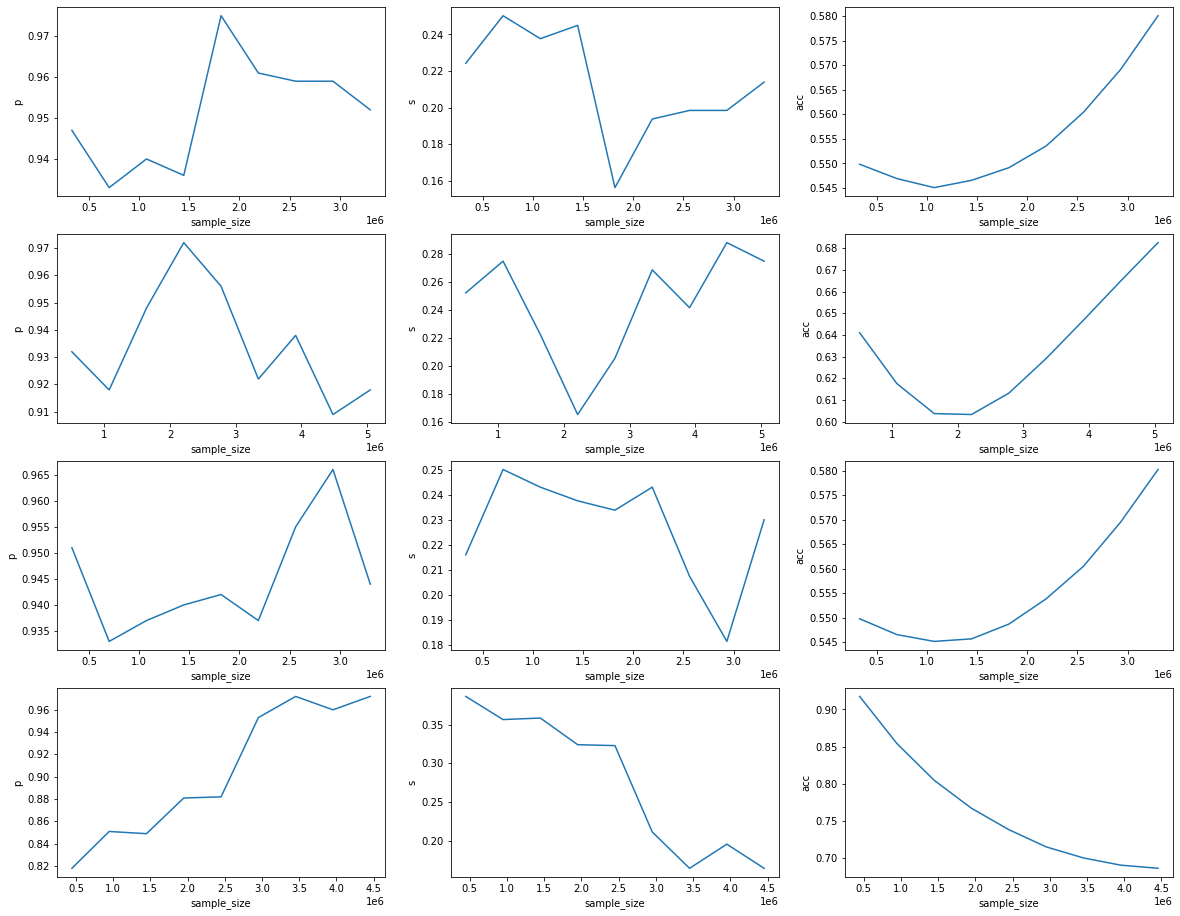

In [504]:
fig, axs = plt.subplots(len(top_dict),3,figsize=(20,16))
for j, col in enumerate(['p', 's', 'acc']):
    
    for i in range(len(top_dict)):
        
        top_dict[names[i]].set_index('sample_size')[col].plot(ax=axs[i][j])
        axs[i][j].set_ylabel(col)

In [501]:
names[3]

'reward+ttl'

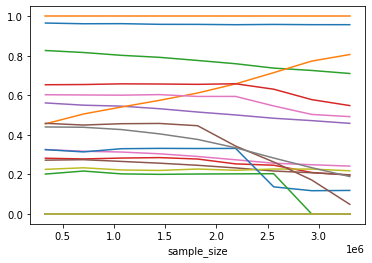

In [492]:
top_dict[names[2]].set_index('sample_size')[class_cols_top].plot(legend=[])


In [493]:
for col in class_cols_top:
    top_dict[names[1]].set_index('sample_size')[col].plot()
    plt.title(col)
    plt.show()
    clear_output(wait=True)
    if input()=='exit': break

# Sample Size Evaluation

### Player 1

In [506]:
play_scr_dict = sample_play_score(x, y_enc[0], num_eps=1000, name=names[0], n_intervals=8, keep=False)

Done!


In [506]:
size_scrs = []

for name, yi in zip(y, names):

    play_scr_dict = sample_play_score(x, yi, num_eps=num_eps, name=name, n_intervals=sample_intervals, keep=False)
    size_scrs.append()
    

Done!


In [1143]:
sample_play_score?

Signature:
sample_play_score(
    xi,
    yi,
    num_eps,
    name='new_scr_df',
    n_intervals=8,
    keep=False,
    dfs_dict=False,
)
Docstring: <no docstring>
File:      c:\users\luisr\desktop\repository\ibm_courses\personal work\notebooks\machine learning basics\reinforcement learning\<ipython-input-505-b0fb60a399dc>
Type:      function


## Plotting

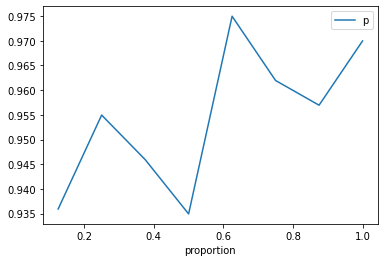

In [512]:
play_scr_dict[names[0]].plot('proportion', 'p')

In [515]:
cls_cols = play_scr_dict[names[0]].columns[7:]

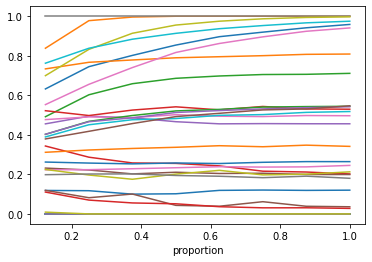

In [517]:
play_scr_dict[names[0]].set_index('proportion')[cls_cols].plot(legend=[])

In [540]:
for col in cls_cols:

    fig, ax = plt.subplots()
    play_scr_dict[names[0]].set_index('sample_size')[col].plot(ax=ax)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    if input()=='exit': break

### Player 2

In [635]:
play_scr_dict = sample_play_score(x, y_enc_op[0], num_eps=1000, name=names[0], n_intervals=8, keep=False)

Done!


## Plotting

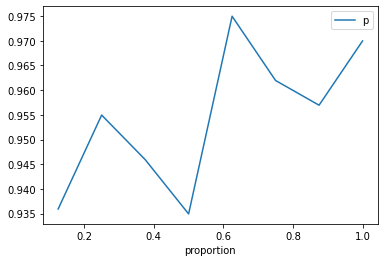

In [512]:
play_scr_dict[names[0]].plot('proportion', 'p')

In [515]:
cls_cols = play_scr_dict[names[0]].columns[7:]

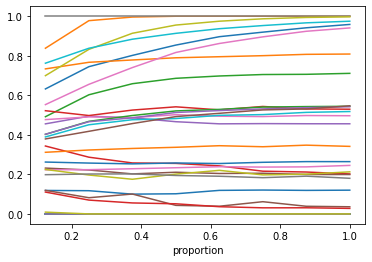

In [517]:
play_scr_dict[names[0]].set_index('proportion')[cls_cols].plot(legend=[])

In [540]:
for col in cls_cols:

    fig, ax = plt.subplots()
    play_scr_dict[names[0]].set_index('sample_size')[col].plot(ax=ax)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)
    if input()=='exit': break

# Playing

sample_model x,y --> et
play_model et --> p's


In [565]:
model = sample_model(x, y_enc[0])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.7s finished


In [614]:
x

,round,obs,action,action2
0,1,0,6,-1
1,2,6,6,3
2,3,63,4,3
3,4,634,4,8
4,5,6348,5,8
...,...,...,...,...
8910438,4,820,0,3
8910439,5,8203,1,3
8910440,6,82031,1,5
8910441,7,820315,6,5


In [591]:
model_op = sample_model(x, y_enc_op[1])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished


In [ ]:
model_fight = play_model(model, names[0], num_eps=1000, times=10, against='model', opponent_model=model_op)

In [627]:
op_vs_random = play_model('random', names[-1], num_eps=1000, times=10, against='model', opponent_model=model_op, stats_dict=op_vs_random)

iteration:  9/10  -  games:  989/1001


In [631]:
random_vs_random = play_model('random', names[0], num_eps=1000, times=10, against='random', opponent_model='random')

iteration:  9/10  -  games:  989/1001


In [569]:
random_op = play_model(model, names[0], num_eps=1000, times=10, against='random')

iteration:  9/10  -  games:  989/1001


In [570]:
random_op[names[0]]

,p,s,n,u
0,0.960,0.196057,1000,960.0
1,0.948,0.222138,1000,948.0
2,0.957,0.202959,1000,957.0
3,0.952,0.213873,1000,952.0
4,0.965,0.183872,1000,965.0
5,0.954,0.209590,1000,954.0
6,0.953,0.211745,1000,953.0
7,0.960,0.196057,1000,960.0
8,0.959,0.198389,1000,959.0
9,0.964,0.186383,1000,964.0


In [628]:
op_vs_random[names[-1]+' op'], op_vs_random[names[-1]+' op']['p'].mean()

(       p         s     n      u
 0  0.281  0.449712  1000  281.0
 1  0.246  0.430894  1000  246.0
 2  0.268  0.443139  1000  268.0
 3  0.301  0.458922  1000  301.0
 4  0.256  0.436640  1000  256.0
 5  0.276  0.447240  1000  276.0
 6  0.288  0.453058  1000  288.0
 7  0.305  0.460638  1000  305.0
 8  0.271  0.444699  1000  271.0
 9  0.276  0.447240  1000  276.0,
 0.2768)

In [633]:
print(random_vs_random[names[0]]['p'].mean()), random_vs_random[names[0]]

0.53


(None,
        p         s     n      u
 0  0.522  0.499766  1000  522.0
 1  0.516  0.499994  1000  516.0
 2  0.547  0.498035  1000  547.0
 3  0.531  0.499288  1000  531.0
 4  0.533  0.499159  1000  533.0
 5  0.539  0.498726  1000  539.0
 6  0.522  0.499766  1000  522.0
 7  0.552  0.497537  1000  552.0
 8  0.525  0.499624  1000  525.0
 9  0.513  0.500081  1000  513.0)

In [634]:
print(random_vs_random[names[0]+' op']['p'].mean()), random_vs_random[names[0]+' op']

0.2414


(None,
        p         s     n      u
 0  0.239  0.426686  1000  239.0
 1  0.230  0.421043  1000  230.0
 2  0.244  0.429708  1000  244.0
 3  0.248  0.432068  1000  248.0
 4  0.232  0.422320  1000  232.0
 5  0.248  0.432068  1000  248.0
 6  0.259  0.438305  1000  259.0
 7  0.241  0.427904  1000  241.0
 8  0.238  0.426072  1000  238.0
 9  0.235  0.424211  1000  235.0)

In [568]:
model_fight[names[0]]

,p,s,n,u
0,1.0,0.0,1000,1000.0
1,1.0,0.0,1000,1000.0
2,1.0,0.0,1000,1000.0
3,1.0,0.0,1000,1000.0
4,1.0,0.0,1000,1000.0
5,1.0,0.0,1000,1000.0
6,1.0,0.0,1000,1000.0
7,1.0,0.0,1000,1000.0
8,1.0,0.0,1000,1000.0
9,1.0,0.0,1000,1000.0


# Sample Size Impact on Both Players

In [871]:
y_i_op[0][0]

0          0.000000
1         -0.222222
2         -0.444444
3         -0.666667
4         -0.888889
             ...   
8910438    0.750000
8910439    1.000000
8910440    1.250000
8910441    1.500000
8910442    2.750000
Length: 8910443, dtype: float64

In [ ]:
sizes_dict = sizes_scores(x_p1, y_enc[0], name=names[0], num_eps=200, times=4, sample_intervals=10, player='first', mode='classifier')

In [ ]:
for i, yi in enumerate(y):

    sizes_dict = sizes_scores(x, yi[0], name=names[0], num_eps=200, times=4, sample_intervals=10, player='first', mode='classifier')

In [1320]:
def size_score_loop(x, yi, names, num_eps=200, times=3, sample_intervals=7, player='first', mode='classifier', provide_dict=False, given_dict=False, pause=True):
    
    if not provide_dict: given_dict={}
        
    loop_size = len(names)
    
    for i, name, y in zip(range(loop_size), names, yi):

        new_dict = sizes_scores(x, y, name=name, num_eps=num_eps, times=times, sample_intervals=sample_intervals, player=player, mode=mode, pause=pause)
        given_dict[name] = [new_dict[name], new_dict[name+' op']]
        
        print(i+1,'/',loop_size)
        clear_output(wait=True)
        
    return given_dict
        

In [1453]:
test = size_score_loop(x=params[2][0], yi=params[2][1][:5], names=params[2][2][:5], num_eps=250, times=2, sample_intervals=1, player='second', mode='regressor', pause=False)

5 / 5


In [1448]:
params = [[x_p1, y_enc, names, 'first', 'classifier'],
[x_p1, y_enc, names, 'first', 'regressor'], 
[x_p2, y_enc_op, names_op, 'second', 'classifier'], 
[x_p2, y_enc_op, names_op, 'second', 'regressor']]

In [ ]:
size_dicts = [p1_size_dict, p1_size_dict_reg, p2_size_dict, p2_size_dict_reg]

In [1323]:
p2_size_dict = size_score_loop(x_p2, y_enc_op, names_op, num_eps=200, times=2, sample_intervals=9, player='second', mode='classifier', pause=False)

10 / 10


In [1325]:
keys = [key for key in p2_size_dict.keys()]

In [1376]:
k = 1  # Player index

In [1377]:
j=-1  # Reward index

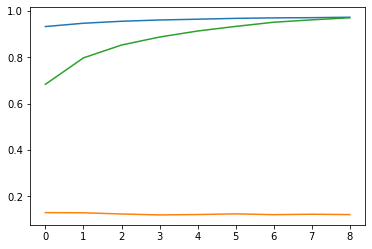

In [1381]:
j+=1
cls_cols = p2_size_dict[keys[j]][k].columns[5:]
p2_size_dict[keys[j]][k][cls_cols].plot(legend=[], label=cls_cols)

In [1382]:
j=-1

In [1389]:
j+=1
print(keys[j])
p2_size_dict[keys[j]][k]

+-a+b*c - g


,acc,p,s,n,u,acc - class 0,acc - class 1,acc - class 2,acc - class 3,acc - class 4,...,acc - class 7,acc - class 8,acc - class 9,acc - class 10,acc - class 11,acc - class 12,acc - class 13,acc - class 14,acc - class 15,acc - class 16
0,0.392456,0.3175,0.466291,200.0,63.5,0.535531,0.570939,0.167224,0.336988,0.417123,...,0.526999,0.0,0.547301,0.108764,0.0,0.188370,0.088841,0.288921,0.821340,0.622206
1,0.421911,0.2900,0.454767,200.0,58.0,0.631669,0.602877,0.104035,0.363874,0.463125,...,0.545145,0.0,0.586641,0.115595,0.0,0.211555,0.062548,0.311164,0.973575,0.720350
2,0.439204,0.2700,0.444751,200.0,54.0,0.717332,0.625611,0.085396,0.358701,0.481677,...,0.534011,0.0,0.616036,0.121937,0.0,0.216977,0.035046,0.332661,0.992952,0.782196
3,0.449938,0.2650,0.442404,200.0,53.0,0.784392,0.620645,0.068289,0.360451,0.491379,...,0.512972,0.0,0.633515,0.118945,0.0,0.216162,0.027027,0.346914,0.999740,0.839875
4,0.460845,0.2625,0.439538,200.0,52.5,0.833006,0.617798,0.059623,0.361925,0.510145,...,0.523151,0.0,0.650792,0.103570,0.0,0.218891,0.024576,0.359654,1.000000,0.875329
5,0.468269,0.2300,0.421510,200.0,46.0,0.870805,0.628705,0.045137,0.355717,0.504469,...,0.515912,0.0,0.660416,0.120899,0.0,0.233119,0.024967,0.363062,0.999653,0.903227
6,0.473612,0.2275,0.418979,200.0,45.5,0.900669,0.623148,0.040640,0.352306,0.517989,...,0.561759,0.0,0.658821,0.121513,0.0,0.233010,0.020892,0.375090,1.000000,0.927764
7,0.477408,0.2450,0.431009,200.0,49.0,0.925284,0.621857,0.041119,0.352388,0.518852,...,0.540085,0.0,0.669869,0.119878,0.0,0.233670,0.013434,0.382817,1.000000,0.946445
8,0.482075,0.2100,0.406653,200.0,42.0,0.945605,0.627912,0.034394,0.354884,0.516904,...,0.542560,0.0,0.677878,0.121593,0.0,0.233449,0.011935,0.384215,1.000000,0.957976


In [1368]:
ps = pd.concat([p2_size_dict[keys[i]][k]['p'] for i in range(len(p2_size_dict))], axis=1)

In [1369]:
accs = pd.concat([p2_size_dict[keys[i]][k]['acc'] for i in range(len(p2_size_dict))], axis=1)

In [1420]:
cls_accs = pd.concat([p2_size_dict[keys[i]][k][p2_size_dict[keys[i]][k].columns[5:]].mean(axis=0) for i in range(len(p2_size_dict))], axis=1)

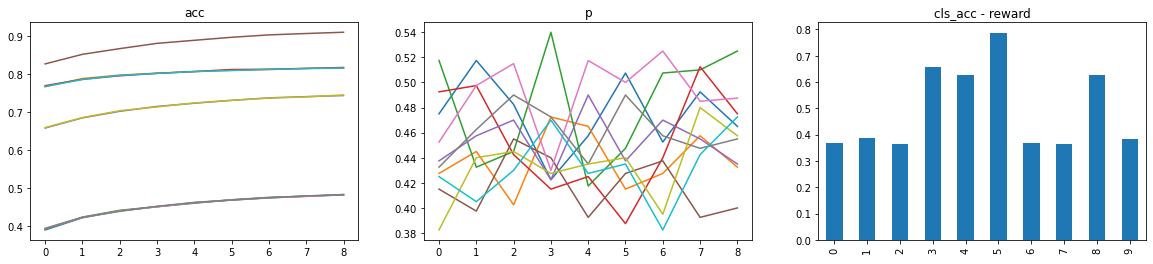

In [1433]:
fig, axs = plt.subplots(1,3,figsize=(20,4))
accs.plot(ax=axs[0], title='acc', legend=[])
ps.plot(ax=axs[1], title='p', legend=[])
cls_accs.mean(axis=0).plot.bar(ax=axs[2], title='cls_acc - reward', legend=[])

C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


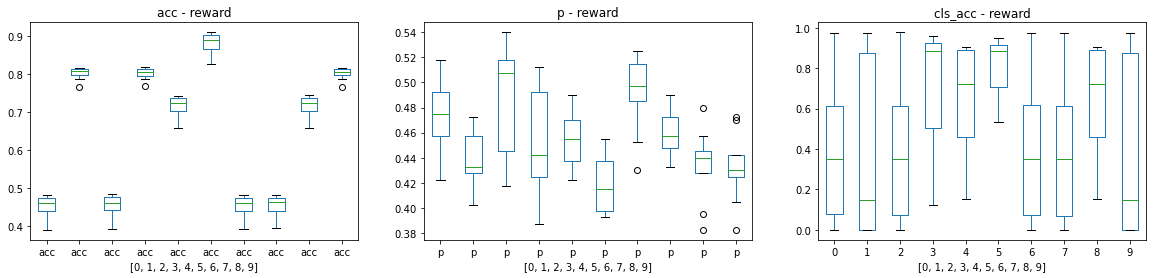

In [1446]:
fig, axs = plt.subplots(1,3,figsize=(20,4))
accs.plot.box(ax=axs[0], title='acc - reward')
ps.plot.box(ax=axs[1], title='p - reward')
cls_accs.plot.box(ax=axs[2], title='cls_acc - reward', legend=[])

[axs[e].set_xlabel(list(range(10))) for e in range(3)]

plt.show()

C:\Users\luisr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


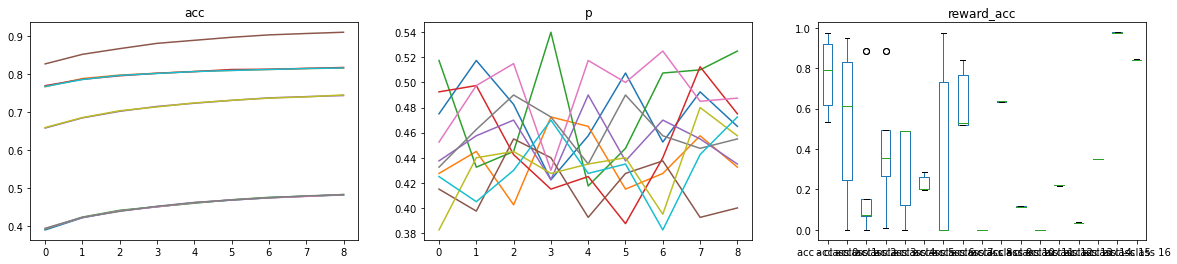

In [1422]:
fig, axs = plt.subplots(1,3,figsize=(20,4))
accs.plot(ax=axs[0], title='acc', legend=[])
ps.plot(ax=axs[1], title='p', legend=[])
cls_accs.plot.box(ax=axs[2], title='reward_acc', legend=[])

# Label Plays

In [931]:
labels = sorted(y_enc_op[0].unique())
obs = []
cnt=0
for label in labels:
    cnt+=1
    test_df = memory_df[y_enc_op[0]==label]
    obs.append([label]+[test_df[col].unique() for col in ['reward', 'ttl_reward', 'decay_reward', 'reward2',  'ttl_reward2', 'decay_reward2', 'fatal_move', 'first_round']])
    print(cnt,'/',len(labels))
    clear_output(wait=True)

30 / 30


In [792]:
labels = sorted(y1.unique())
obs = []
cnt=0
for label in labels:
    cnt+=1
    test_df = memory_df[y1==label]
    obs.append([label]+[test_df[col].unique() for col in ['reward', 'ttl_reward', 'decay_reward', 'reward2',  'ttl_reward2', 'decay_reward2', 'fatal_move', 'first_round']])
    print(cnt,'/',len(labels))
    clear_output(wait=True)

30 / 30


In [932]:
label_obs = pd.DataFrame(obs, columns=['label', 'reward', 'ttl_reward', 'decay_reward', 'reward2',  'ttl_reward2', 'decay_reward2', 'fatal_move', 'first_round'])

In [765]:
action2_lst = memory_df.action2.tolist()

In [767]:
action2_lst[:5]

[-1, 3, 3, 8, 8]

In [768]:
first_round = [1 if i==-1 else 0 for i in action2_lst]

In [773]:
memory_df['first_round'] = first_round

In [934]:
top

Index(['acc - class 3', 'acc - class 29', 'acc - class 0', 'acc - class 1',
       'acc - class 2', 'acc - class 28'],
      dtype='object')

In [933]:
label_obs

,label,reward,ttl_reward,decay_reward,reward2,ttl_reward2,decay_reward2,fatal_move,first_round
0,0,[1],[1],[1.7777777777777777],[0],[0],[0.0],[0],[0]
1,1,[1],[1],[1.7142857142857142],[0],[0],[0.0],[0],[0]
2,2,[1],[1],[1.6],[0],[0],[0.0],[0],[0]
3,3,[0],[1],[1.5555555555555556],[0],[0],[0.0],[0],[0]
4,4,[0],[1],[1.4285714285714286],[0],[0],[0.0],[0],[0]
5,5,[0],[1],[1.3333333333333333],[0],[0],[0.0],[0],[0]
6,6,[0],[1],[1.2],[0],[0],[0.0],[0],[0]
7,7,[0],[1],[1.1428571428571428],[0],[0],[0.0],[0],[0]
8,8,[0],[1],[1.1111111111111112],[0],[0],[0.0],[0],[0]
9,9,[0],[1],[0.8888888888888888],[0],[0],[0.0],[0],[0]


In [1024]:
et1, et1_acc, et1_class_acc  = sample_model(x, y_enc_op[0], score=True)

In [1031]:
i

9

In [1034]:
len(names), loop_size

(9, 10)

In [1077]:
def sample_model_loop(x, y_lst, names, score=True, verbose=0, n_jobs=1, mode='classifier'):

    scrs = []
    loop_size = len(y_lst)
    for i in range(loop_size):

        print(i,'/',loop_size)
        clear_output(wait=True)
        et1, et1_acc, et1_class_acc  = sample_model(x, y_lst[i], score=True, verbose=verbose, n_jobs=n_jobs, mode=mode)
        scrs.append([names[i], et1_acc] + et1_class_acc)
    
    df = pd.DataFrame(scrs)
    df.columns = ['name', 'acc']+['class{}'.format(i) for i in range(len(df.columns)-2)]
    df = df.set_index('name', drop=True)
  
    return df

In [1114]:
reward_accs_reg = sample_model_loop(x_p2, y_enc_op, names=names_op, mode='regressor')

9 / 10


In [1130]:
rewards_dict = {'p2_cls':reward_accs_op, 'p2_reg':reward_accs_op_reg, 'p1_cls':reward_accs, 'p1_reg':reward_accs_reg}

In [1134]:
keys = [i for i in rewards_dict.keys()]

<BarContainer object of 10 artists>

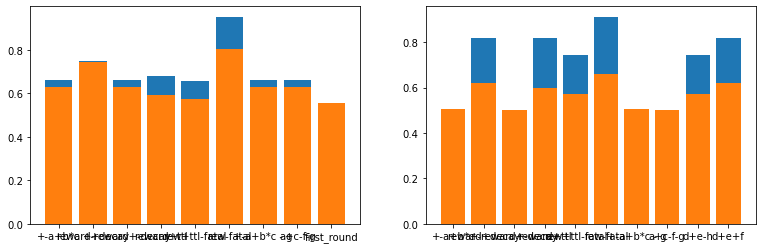

In [1137]:
fig, axs = plt.subplots(1, 2, figsize=(13,4))

axs[0].bar(rewards_dict[keys[0]].index, rewards_dict[keys[0]].acc)
axs[0].bar(rewards_dict[keys[1]].index, rewards_dict[keys[1]].acc)
axs[1].bar(rewards_dict[keys[2]].index, rewards_dict[keys[2]].acc)
axs[1].bar(rewards_dict[keys[3]].index, rewards_dict[keys[3]].acc)

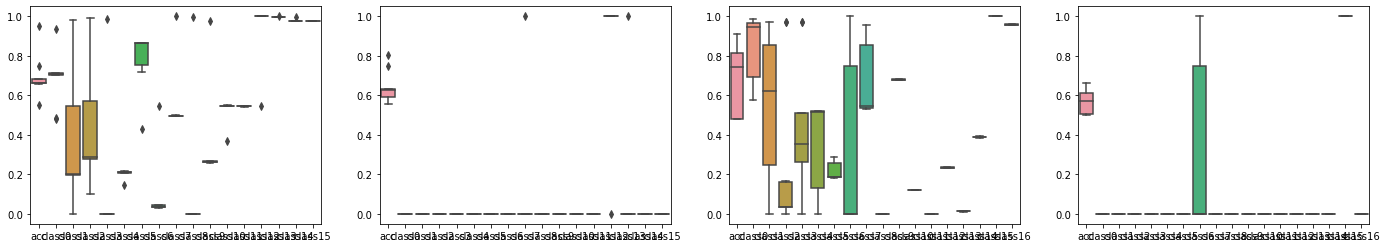

In [1140]:
fig, axs = plt.subplots(1,4, figsize=(24,4))

for i in range(4):
    
    sns.boxplot(data=rewards_dict[keys[i]], ax=axs[i])
    
plt.show()

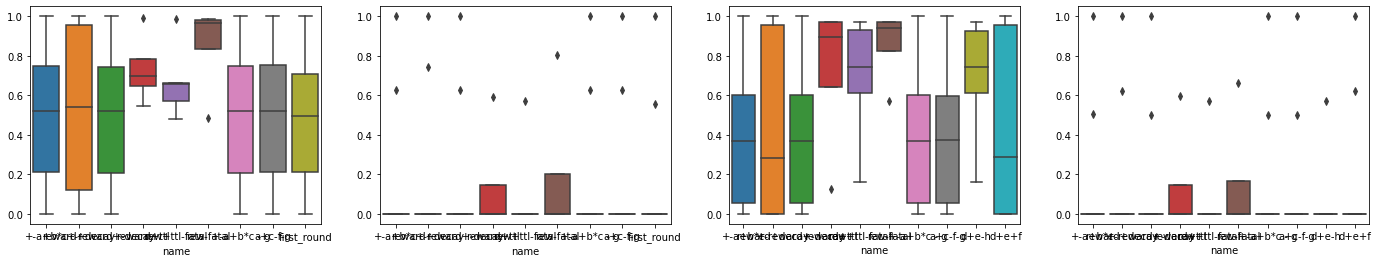

In [1141]:
fig, axs = plt.subplots(1,4, figsize=(24,4))

for i in range(4):
    
    sns.boxplot(data=rewards_dict[keys[i]].T, ax=axs[i])
    
plt.show()

# Opponent Best Model

In [ ]:
new_dict = play_model('random', name=names[0], num_eps=150, times=10, against='model', opponent_model=et1)

In [1025]:
et1_acc

0.48113042082911955

In [833]:
new_dict[names[0]+' op'].mean()

p      0.308667
s      0.460467
n    150.000000
u     46.300000
dtype: float64

In [832]:
new_dict[names[0]].mean()

p      0.434667
s      0.496124
n    150.000000
u     65.200000
dtype: float64

In [836]:
1 - new_dict[names[0]+' op'].mean() - new_dict[names[0]].mean()

p      0.256667
s      0.043409
n   -299.000000
u   -110.500000
dtype: float64

In [935]:
memory_df

,ep,round,obs,action,reward,action2,reward2,ttl_reward,decay_reward,ttl_reward2,decay_reward2,fatal_move,fatal_move2,first_round
0,1,1,0,6,0,-1,0,1,0.000000,0,0.00,0,0,1
1,1,2,6,6,0,3,0,1,0.222222,0,0.00,0,0,0
2,1,3,63,4,0,3,0,1,0.444444,0,0.00,0,0,0
3,1,4,634,4,0,8,0,1,0.666667,0,0.00,0,0,0
4,1,5,6348,5,0,8,0,1,0.888889,0,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910438,1140000,4,820,0,0,3,0,0,0.000000,1,0.75,0,0,0
8910439,1140000,5,8203,1,0,3,0,0,0.000000,1,1.00,0,0,0
8910440,1140000,6,82031,1,0,5,0,0,0.000000,1,1.25,0,0,0
8910441,1140000,7,820315,6,0,5,0,0,0.000000,1,1.50,1,0,0


# Winning Rate

In [1485]:
msk = np.random.rand(len(y_enc_op[0]))<0.8

In [1486]:
acc_df, plays_dict = sample_compare_rewards(x_p2, y_enc_op, names_op, seed=msk, num_eps=150, times=15, player='second')

iteration:  15/15  -  games:  149/151


In [1479]:
acc_df

,acc,class-0,class-1,class-2,class-3,class-4,class-5,class-6,class-7,class-8,class-9,class-10,class-11,class-12,class-13,class-14,class-15,class-16
0,0.482044,0.941923,0.624763,0.033519,0.355543,0.517642,0.193637,0.0,0.530271,0.0,0.679242,0.119568,0.0,0.237132,0.014269,0.384045,1.0,0.957360
1,0.816666,0.983923,0.000000,0.000000,0.002597,0.000000,0.280668,1.0,0.957520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.482066,0.942090,0.624763,0.033519,0.355543,0.517642,0.193637,0.0,0.530271,0.0,0.679228,0.119568,0.0,0.237132,0.014269,0.384045,1.0,0.957679
3,0.817656,0.973609,0.119834,0.971076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.744861,0.610549,0.930061,0.158762,0.970912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.910515,0.572288,0.969080,0.970985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.482069,0.941986,0.624763,0.033519,0.355543,0.517642,0.193637,0.0,0.530271,0.0,0.679214,0.119568,0.0,0.237132,0.014269,0.384045,1.0,0.957972
7,0.482054,0.942111,0.624763,0.033519,0.355543,0.517642,0.193637,0.0,0.530271,0.0,0.679187,0.119568,0.0,0.237132,0.014269,0.384045,1.0,0.957653
8,0.744844,0.610440,0.930054,0.158762,0.970967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.816622,0.983865,0.000000,0.000000,0.002597,0.000000,0.280668,1.0,0.957520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1493]:
player = 1

In [1494]:
p_df, s_df = (pd.concat([plays_dict[names_op[i]][player][statistic] for i in range(len(names_op))], axis=1) for statistic in ['p', 's'])

In [1499]:
p_df.columns, s_df.columns = names_op, names_op

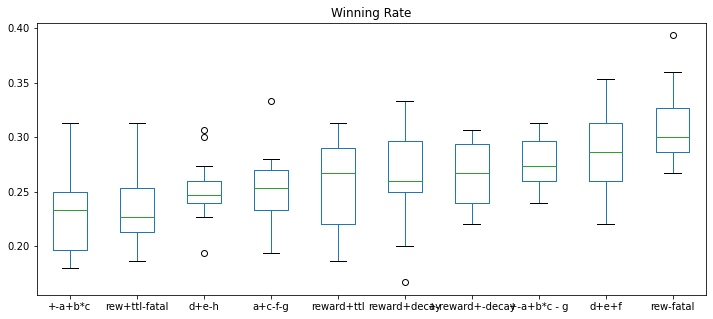

In [1574]:
p_df.loc[:, p_df.mean(axis=0).sort_values().index].plot.box(figsize=(12,5), title='Winning Rate')

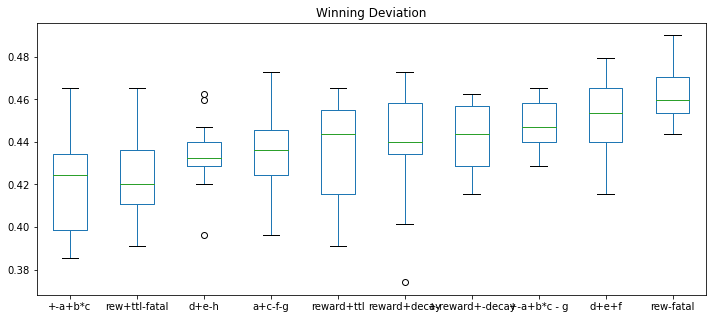

In [1573]:
s_df.loc[:, p_df.mean(axis=0).sort_values().index].plot.box(figsize=(12,5), title='Winning Deviation')

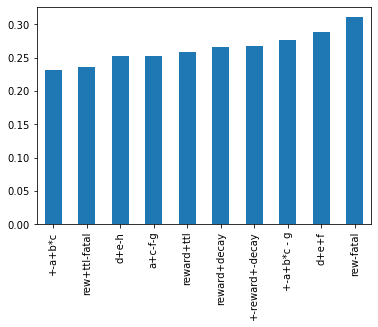

In [1584]:
p_df.mean(axis=0).sort_values().plot.bar()

In [1585]:
p_df

,+-a+b*c,reward+decay,+-reward+-decay,reward+ttl,rew+ttl-fatal,rew-fatal,+-a+b*c - g,a+c-f-g,d+e-h,d+e+f
0,0.233333,0.253333,0.240000,0.186667,0.240000,0.286667,0.253333,0.333333,0.240000,0.253333
1,0.186667,0.300000,0.293333,0.273333,0.213333,0.326667,0.273333,0.226667,0.193333,0.340000
2,0.240000,0.313333,0.293333,0.300000,0.313333,0.353333,0.266667,0.213333,0.246667,0.220000
3,0.313333,0.233333,0.220000,0.213333,0.226667,0.273333,0.240000,0.273333,0.260000,0.253333
4,0.233333,0.200000,0.266667,0.273333,0.240000,0.300000,0.246667,0.246667,0.273333,0.320000
5,0.200000,0.280000,0.226667,0.313333,0.273333,0.273333,0.306667,0.266667,0.300000,0.353333
6,0.206667,0.260000,0.246667,0.226667,0.213333,0.393333,0.266667,0.253333,0.240000,0.286667
7,0.300000,0.246667,0.300000,0.206667,0.226667,0.306667,0.300000,0.260000,0.246667,0.280000
8,0.193333,0.320000,0.260000,0.280000,0.280000,0.293333,0.253333,0.206667,0.260000,0.266667
9,0.246667,0.166667,0.286667,0.206667,0.193333,0.286667,0.293333,0.266667,0.253333,0.300000


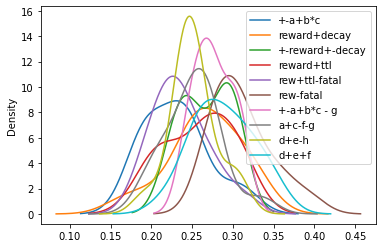

In [1595]:
p_df.plot.kde()

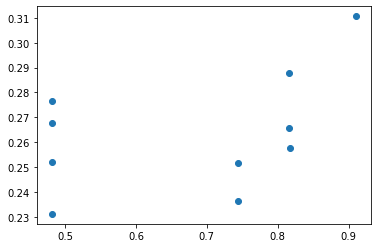

In [1589]:
plt.scatter(acc_df['acc'], p_df.mean(axis=0))

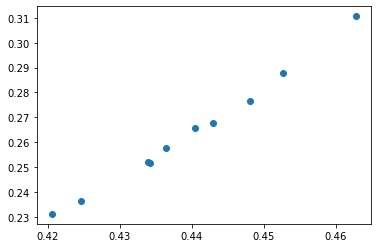

In [1608]:
plt.scatter(s_df.mean(axis=0), p_df.mean(axis=0))

# Random Player

In [1514]:
random_dict = play_model('random', 'new_df', num_eps=1000, times=10, )

iteration:  10/10  -  games:  989/1001


In [1609]:
std = []
for num_ep in range(100,4000, 70):
    print('Initializing {} games'.format(num_ep))
    random_dict = play_model('random', 'new_df', num_eps=num_ep, times=15)
    std.append([num_ep, random_dict['player2']['p'].mean(), random_dict['player2']['s'].mean(), random_dict['player2']['p'].std(), random_dict['player2']['s'].std()])
    

iteration:  15/15  -  games:  3862/3951


In [1616]:
random_stats = pd.DataFrame(std, columns=['matches', 'avg p-rate', 'avg p-std', 'std p-rate', 'std p-std'])

In [1617]:
random_stats = random_stats.set_index('matches')

In [1618]:
avgs, stds = ['avg p-rate', 'avg p-std'] ,['std p-rate', 'std p-std']

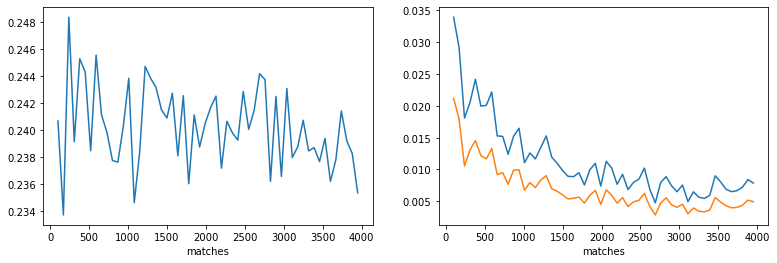

In [1639]:
fig, axs = plt.subplots(1,2,figsize=(13,4))

random_stats[avgs[0]].plot(ax=axs[0])
#random_stats[avgs[1]].plot(ax=axs[1], color='orange')

random_stats[stds[0]].plot(ax=axs[1])
random_stats[stds[1]].plot(ax=axs[1])

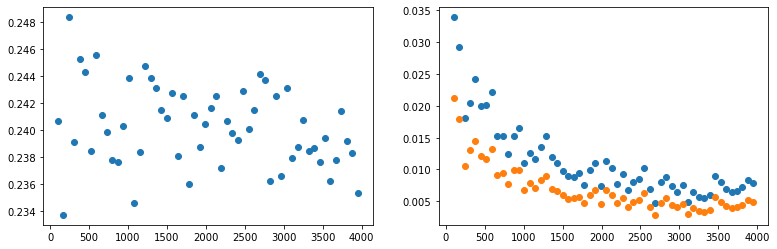

In [1640]:
fig, axs = plt.subplots(1,2,figsize=(13,4))

axs[0].scatter(random_stats.index, random_stats[avgs[0]])
#random_stats[avgs[1]].plot(ax=axs[1], color='orange')

axs[1].scatter(random_stats.index, random_stats[stds[0]])
axs[1].scatter(random_stats.index, random_stats[stds[1]])

#random_stats[stds[0]].plot(ax=axs[2])
#random_stats[stds[1]].plot(ax=axs[2])

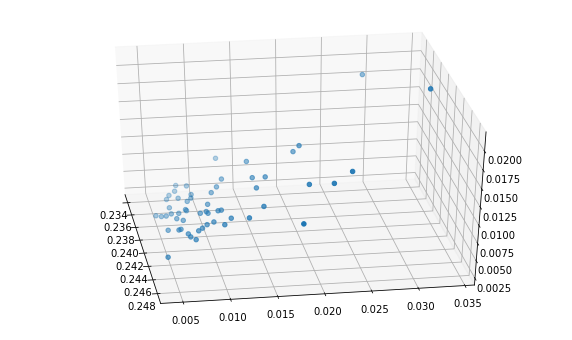

In [1658]:
for angle in range(1,360,10):

    fig = plt.figure(figsize=(10,6))
    ax0 = fig.add_subplot(1,1,1, projection='3d')

    ax0.scatter(random_stats[avgs[0]], random_stats[stds[0]], random_stats[stds[1]])
    ax0.view_init(angle/10,angle)
    
    plt.show()
    plt.pause(0.001)
    clear_output(wait=True)

In [1621]:
random_stats.describe()

,avg p-rate,avg p-std,std p-rate,std p-std
count,56.000000,56.000000,56.000000,56.000000
mean,0.240252,0.427199,0.011311,0.006899
std,0.002995,0.001822,0.006041,0.003709
min,0.233725,0.423151,0.004765,0.002864
25%,0.238221,0.425953,0.007417,0.004497
50%,0.240168,0.427060,0.009123,0.005588
75%,0.242511,0.428585,0.012809,0.008038
max,0.248333,0.432475,0.033905,0.021166


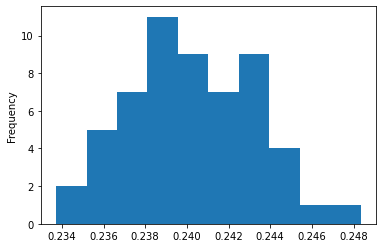

In [1630]:
random_stats[avgs[0]].plot.hist()

In [12]:
import scipy.stats as stats

In [8]:
df1 = pd.read_csv('random_games_p1_75000.csv', index_col=0)
df2 = pd.read_csv('random_games_p2_75000.csv', index_col=0)

In [9]:
df1.head()

,round,obs,action,reward,fatal_move,reward_ttl,reward_decay,fatal_move_ttl,fatal_move_decay,tight,tight_ttl,tight_decay,game
0,1,-1,4,0,0,1,0.25,0,0.00,0.0,0.0,0.0,1
1,2,43,0,0,0,1,0.50,0,0.00,0.0,0.0,0.0,1
2,3,4308,7,0,0,1,0.75,0,0.00,0.0,0.0,0.0,1
3,4,430875,1,1,0,1,1.00,0,0.00,0.0,0.0,0.0,1
4,1,-1,3,0,0,0,0.00,1,0.25,0.0,0.0,0.0,2


In [16]:
def n_games_progression(n_games_df, bins=25, alfa=0.05, e_min=0.02):

    prog = []
    z_a2 = stats.norm.ppf(alfa/2)
    p_cols = ['reward', 'fatal_move', 'tight']
    cols = ['game', 'reward', 'fatal_move', 'tight', 'obs', 'action']
    
    n_games_grp = n_games_df.groupby('game').sum()
    n_games = len(n_games_grp)
    avgs = n_games_grp.mean()[p_cols].tolist()
    stds = [(p*(1-p)/n_games)**(1/2) for p in avgs]
    n_games_grp.std()[p_cols].tolist()

    interval = int(n_games/bins)   
    for game in range(interval, n_games+1, interval):
        
        clear_output(wait=True)
        print('Game: {}/{}'.format(game, n_games))
        
        n_df = n_games_df[n_games_df.game<=game][cols]
        
        unique_rounds = len(n_df['obs'].unique())
        unique_moves = len(n_df.drop_duplicates(subset=['obs', 'action']))
        rounds = len(n_df)
        n = game
        prog_row = [n]
        for i, col in enumerate(p_cols):

            p = n_df.groupby('game').sum()[col].mean()
            q = 1-p
            p_dif = p - avgs[i]
            s = (p*(1-p)/n)**(1/2)
            s_dif = s - stds[i]
            e = s*z_a2
            n_min =  (p*q*z_a2**2)/(e_min**2)
            prog_row.extend([p, p_dif, s, s_dif, e, n_min])

        prog.append(prog_row + [rounds, unique_rounds, unique_moves])
        
#--------------------------
                          
    prog = pd.DataFrame(prog, columns=['game']+ [col+' - '+stat for col in p_cols for stat in ['p', 'p_dif', 's', 's_dif', 'e', 'n_min']] + ['rounds', 'unique_rounds', 'unique_moves'])
    
    return prog

In [17]:
prog = n_games_progression(df2, bins=75)

Game: 75000/75000


In [18]:
prog_copy = prog.copy().set_index('game')

In [19]:
p_cols = ['reward', 'fatal_move', 'tight']

(reward_cols, fatal_move_cols, tight_cols) = ([col+' - '+stat for col in p_cols[:i] for stat in ['p', 'p_dif', 's', 's_dif', 'e', 'n_min']] for i in [1,2,3])

stats_cols = {['p', 'p_dif', 's', 's_dif', 'e', 'n_min'][i]:[col+' - '+stat for col in p_cols for stat in [['p', 'p_dif', 's', 's_dif', 'e', 'n_min'][i]]] for i in range(6)}

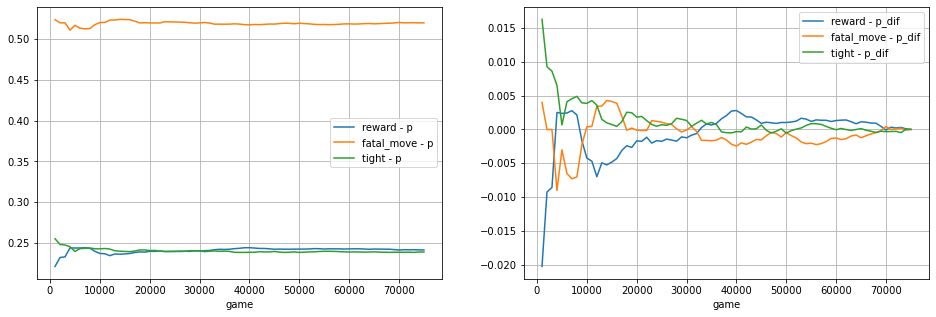

In [20]:
colors = ['blue', 'orange', 'green']
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

prog_copy[stats_cols['p']].plot(ax=ax0)
prog_copy[stats_cols['p_dif']].plot(ax=ax1)

ax0.grid()
ax1.grid()
#for i, y in enumerate(yi.mean()):

#   ax0.plot(x, [y for j in range(len(x))], color=colors[i], linewidth=2)

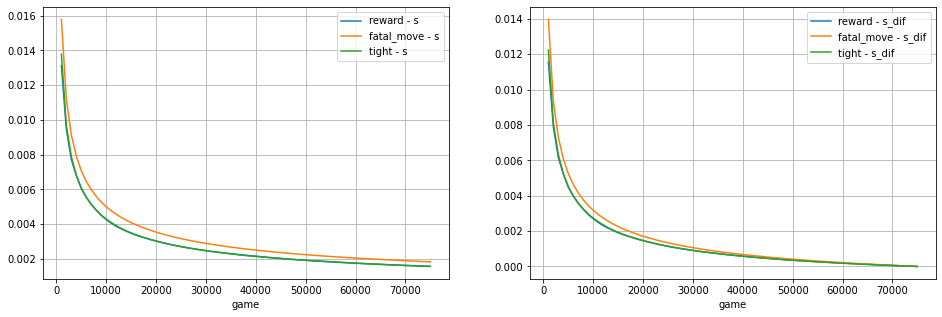

In [21]:
colors = ['blue', 'orange', 'green']
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

prog_copy[stats_cols['s']].plot(ax=ax0)
prog_copy[stats_cols['s_dif']].plot(ax=ax1)


ax0.grid()
ax1.grid()
#for i, y in enumerate(yi.mean()):

#   ax0.plot(x, [y for j in range(len(x))], color=colors[i], linewidth=2)

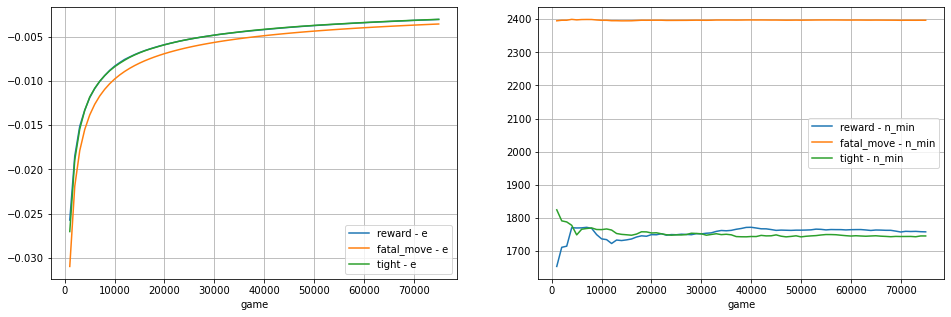

In [22]:
colors = ['blue', 'orange', 'green']
fig = plt.figure(figsize=(16,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

prog_copy[stats_cols['e']].plot(ax=ax0)
prog_copy[stats_cols['n_min']].loc[:].plot(ax=ax1)


ax0.grid()
ax1.grid()
#for i, y in enumerate(yi.mean()):

#   ax0.plot(x, [y for j in range(len(x))], color=colors[i], linewidth=2)

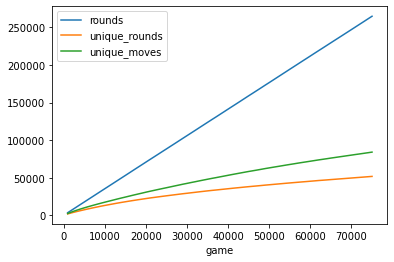

In [24]:
fig, axs = plt.subplots(1,1,figsize=(6,4))

prog.set_index('game').iloc[:, -3:].plot(ax=axs)

plt.show()